In [1]:
%cd ..


/home/druhe/rail1/src/cnf


In [2]:
from algebra.cliffordalgebra import CliffordAlgebra
import matplotlib.pyplot as plt

import numpy as np
import torch
import math

torch.set_default_dtype(torch.float64)

In [3]:
cl = CliffordAlgebra((-1, 1, 1))

In [30]:
b = 5
t = 15
data = np.load('us1.npy')


In [31]:
def show_data(data, t):
    fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

    max_val = data[t].max()
    min_val = data[t].min()
    
    im1 = ax[0].imshow(data[t, :, :, 0], vmin=min_val, vmax=max_val)
    im2 = ax[1].imshow(data[t, :, :, 1], vmin=min_val, vmax=max_val)
    im3 = ax[2].imshow(data[t, :, :, 2], vmin=min_val, vmax=max_val)

    fig.colorbar(im1, ax=ax[0])
    fig.colorbar(im2, ax=ax[1])
    fig.colorbar(im3, ax=ax[2])

    plt.show()

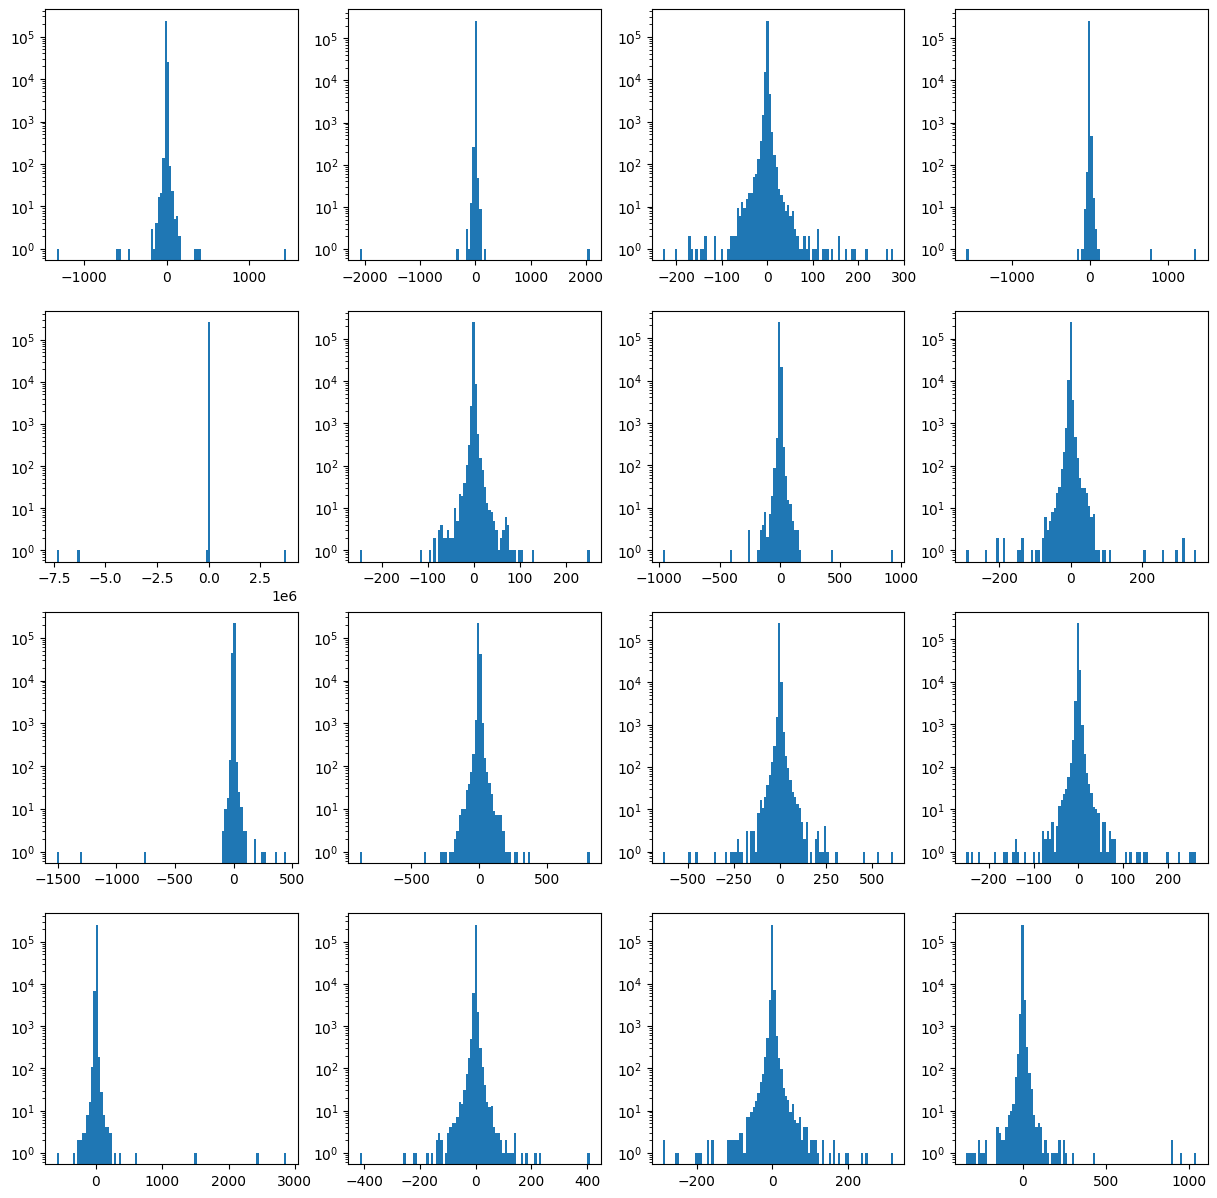

In [38]:
# Square plot based on len(data)
fig, ax = plt.subplots(nrows=math.ceil(math.sqrt(len(data))), ncols=math.ceil(math.sqrt(len(data))), figsize=(15, 15))

for b in range(len(data)):
    d = data[b].transpose(1, 2, 3, 0)
    d_cl = cl.embed_grade(torch.from_numpy(d), 2)
    d_norm = cl.norm(d_cl, safe_abs_sqrt=False)
    d_norm_cl = d_cl / d_norm

    # histogram d_norm_cl at the correct ax
    ax_index = np.unravel_index(b, ax.shape)
    ax[ax_index].hist(d_norm_cl.numpy().flatten(), bins=100)
    # yscale log
    ax[ax_index].set_yscale('log')

plt.show()



In [23]:
data = data[b].transpose(1, 2, 3, 0)
data_cl = cl.embed_grade(torch.from_numpy(data), 2)
norm = cl.norm(data_cl, safe_abs_sqrt=False)
data_norm_cl = data_cl / norm

# coef = (data_norm_cl.abs().log() - math.log(1e5)) / (math.log(1e8) - math.log(1e5))

In [24]:
data_norm_cl.min(), data_norm_cl.max()

(tensor(-247.4279), tensor(251.0236))

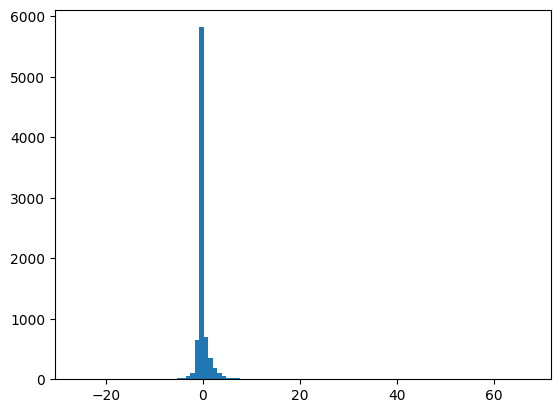

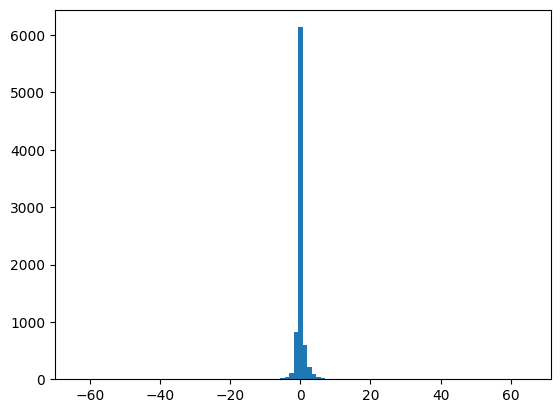

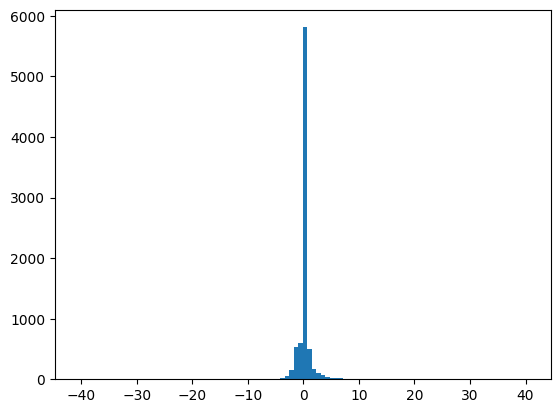

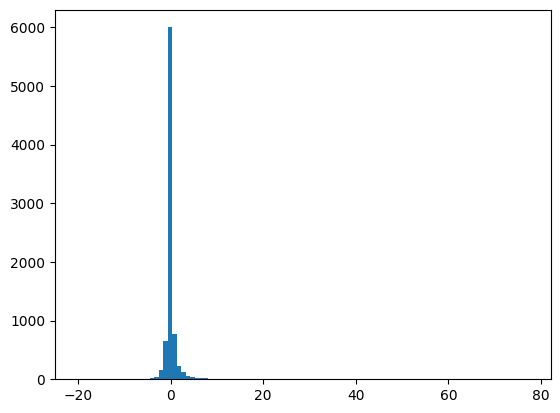

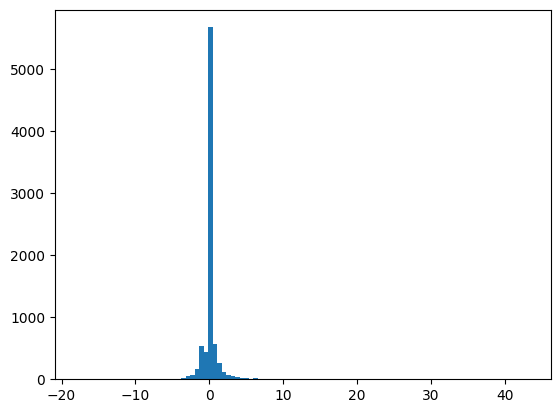

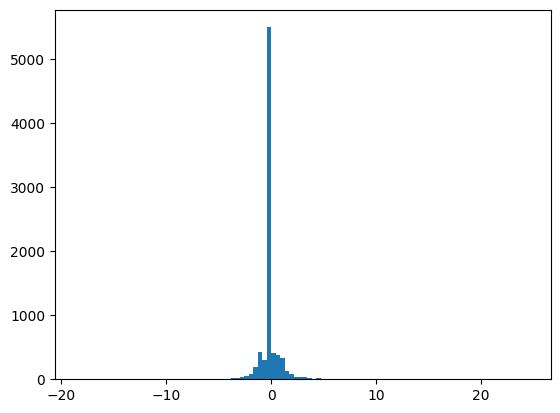

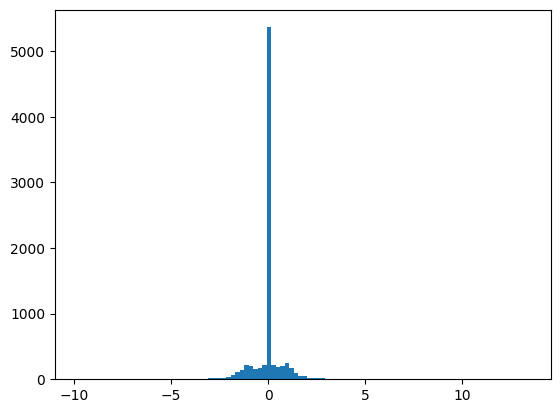

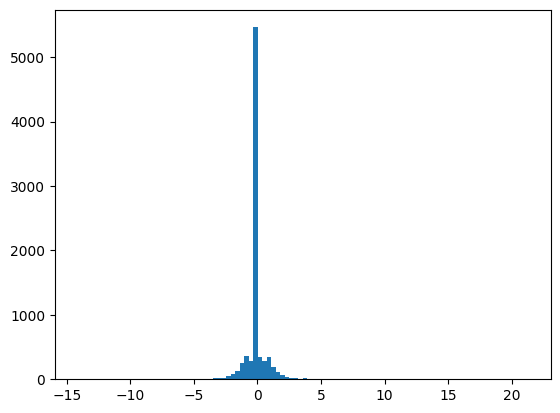

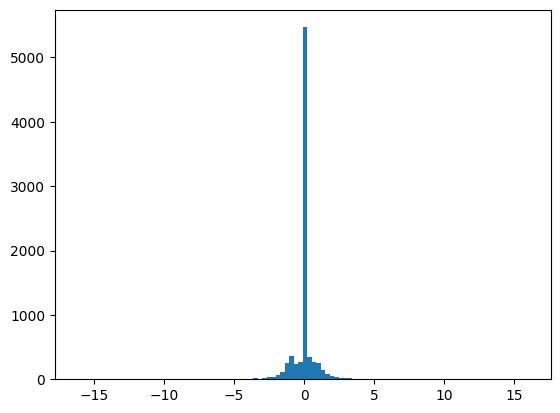

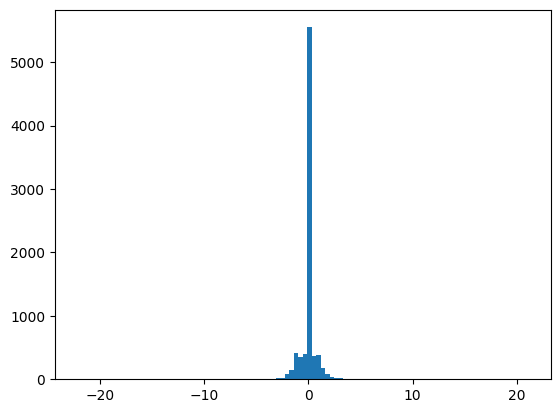

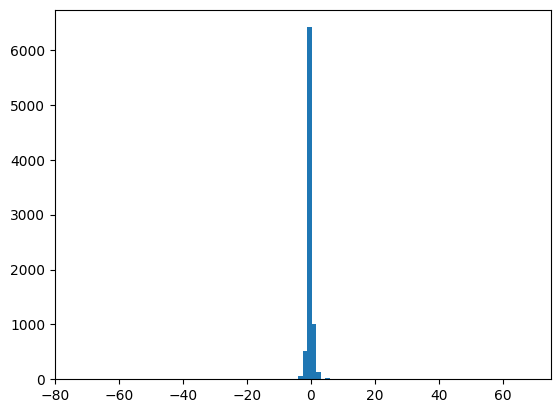

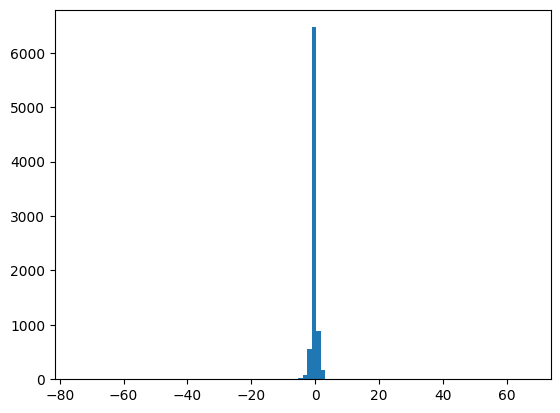

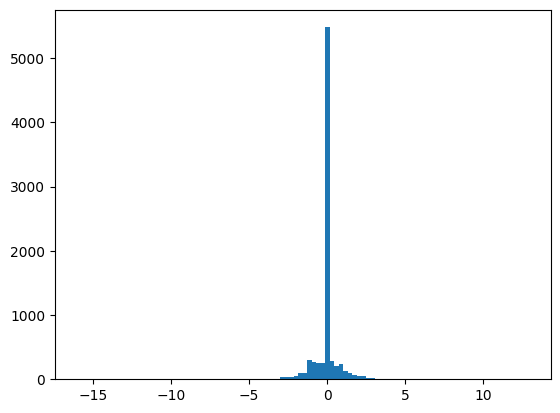

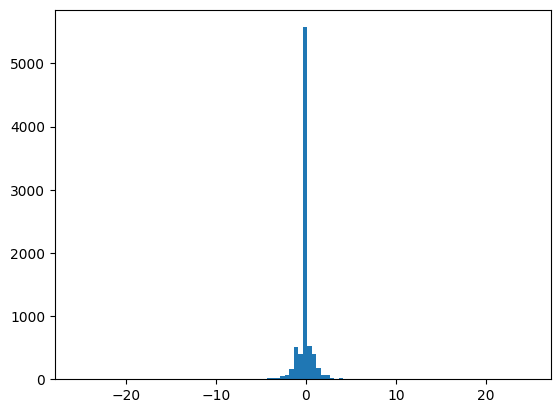

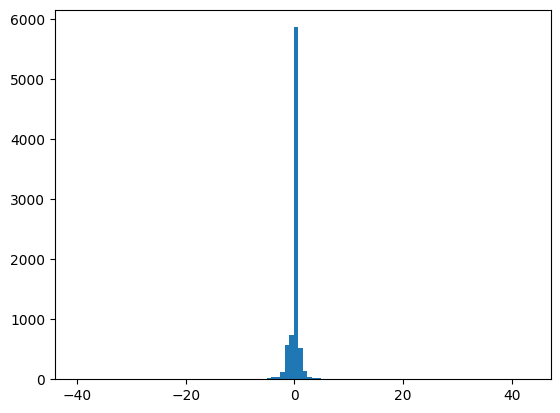

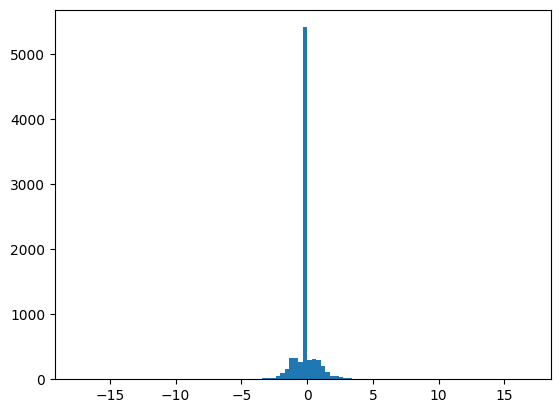

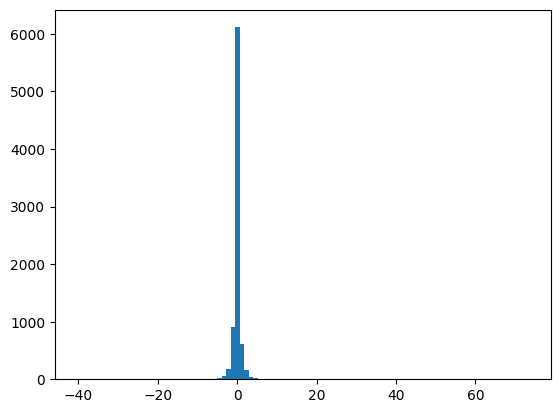

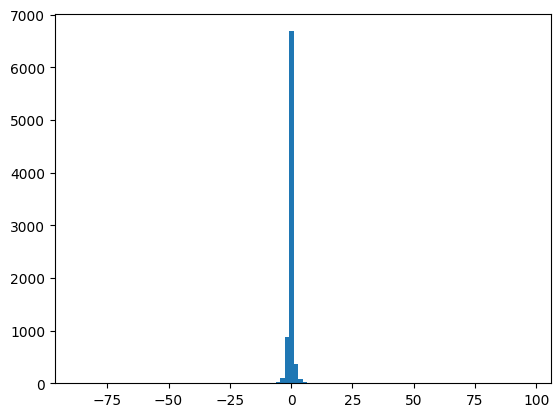

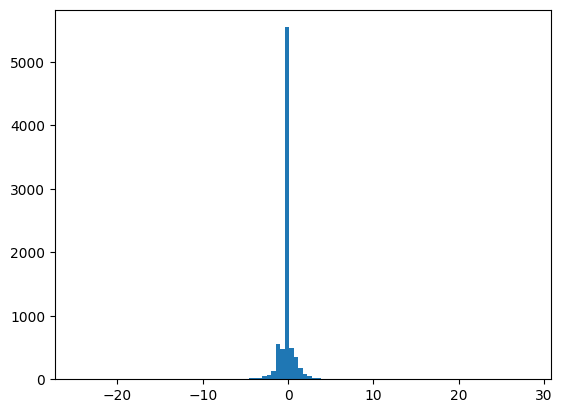

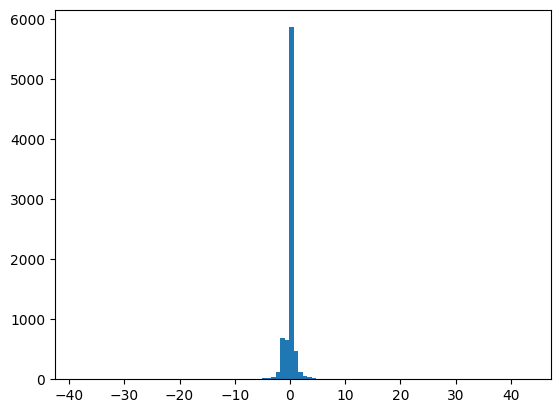

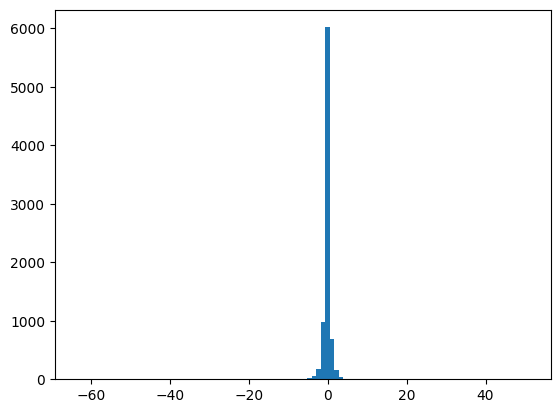

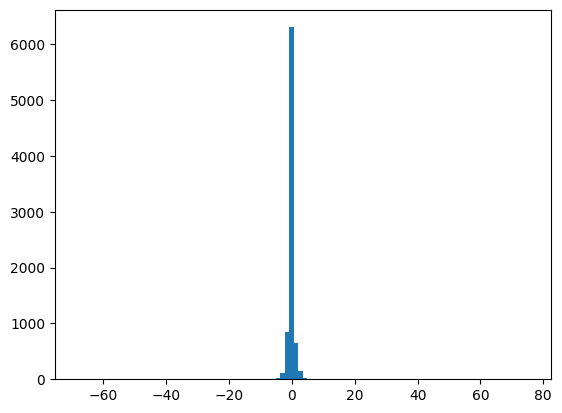

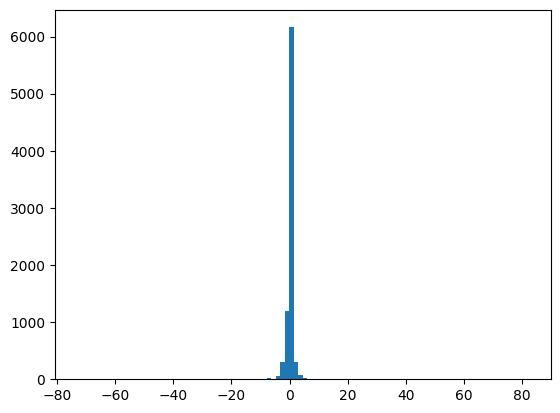

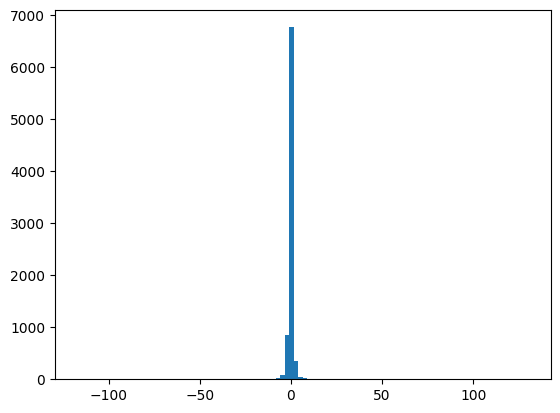

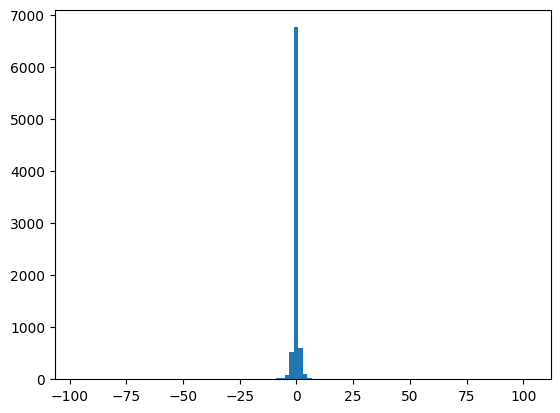

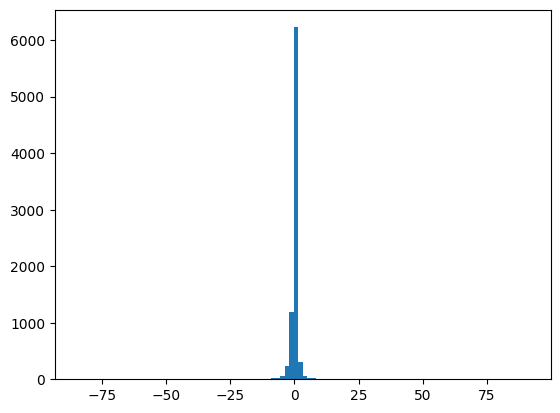

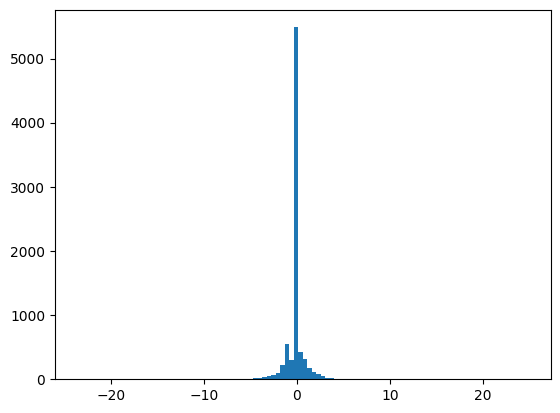

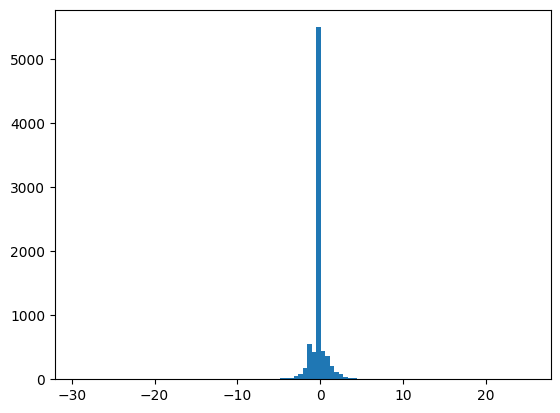

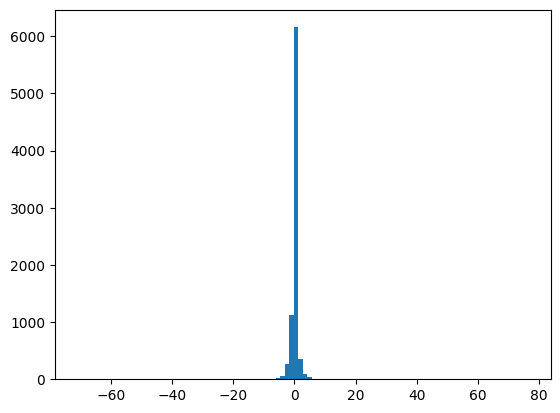

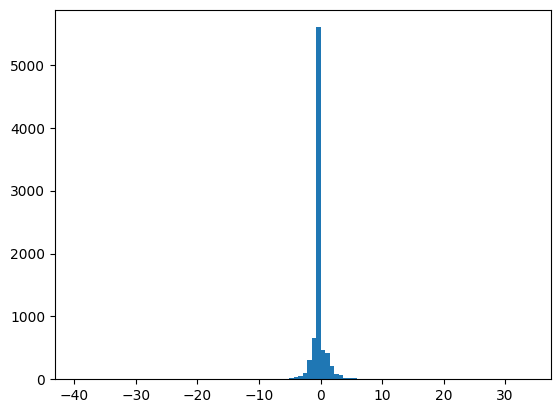

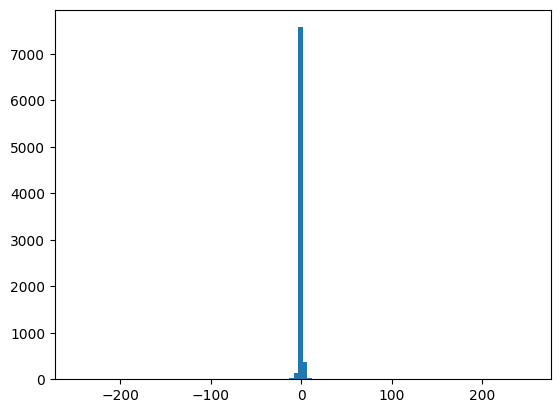

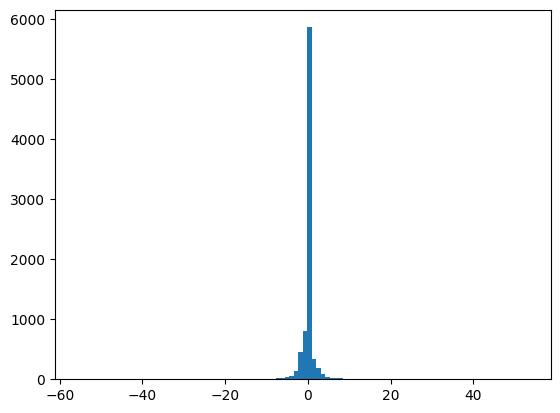

In [25]:
# histogram of data_norm_cl
for t in range(data_norm_cl.shape[0]):
    plt.hist(data_norm_cl[t].numpy().flatten(), bins=100)
    plt.show()

In [26]:
v = cl.get_grade(data_norm_cl, 2)
v.min(), v.max()

(tensor(-247.4279), tensor(251.0236))

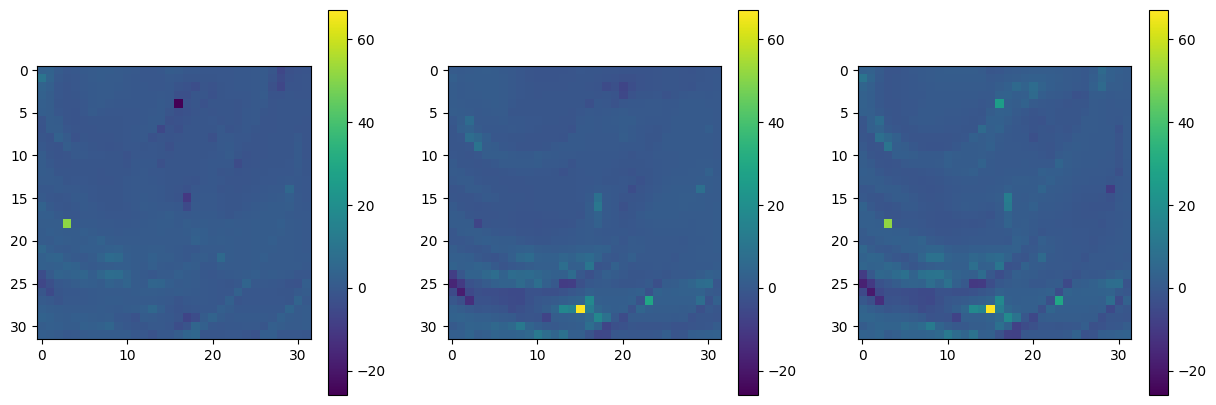

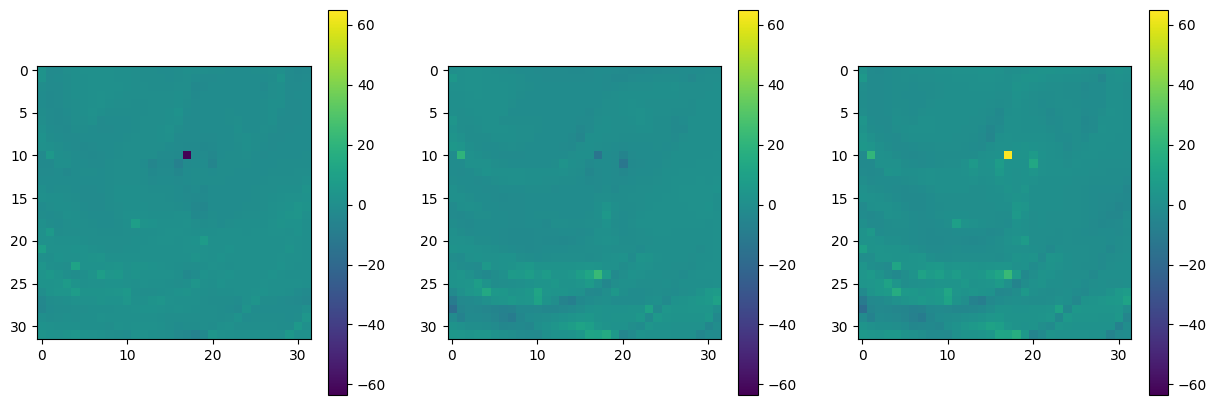

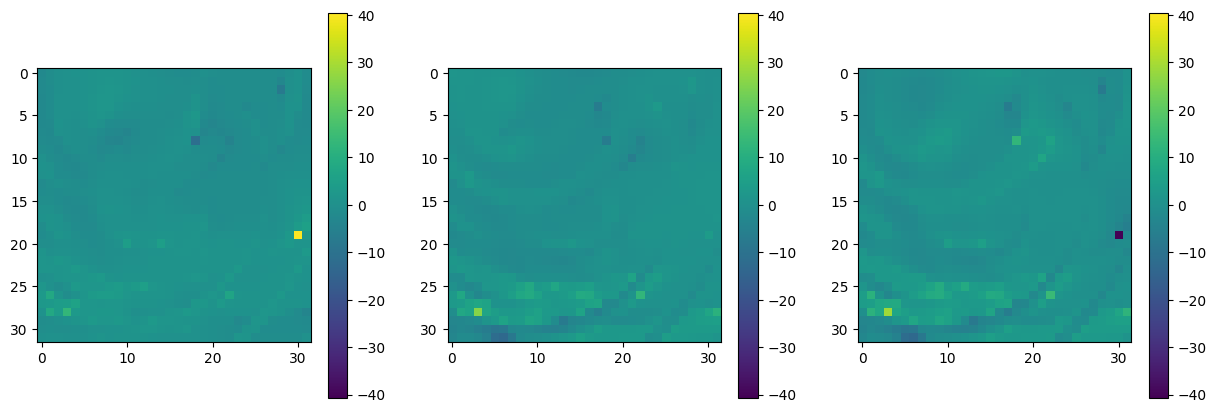

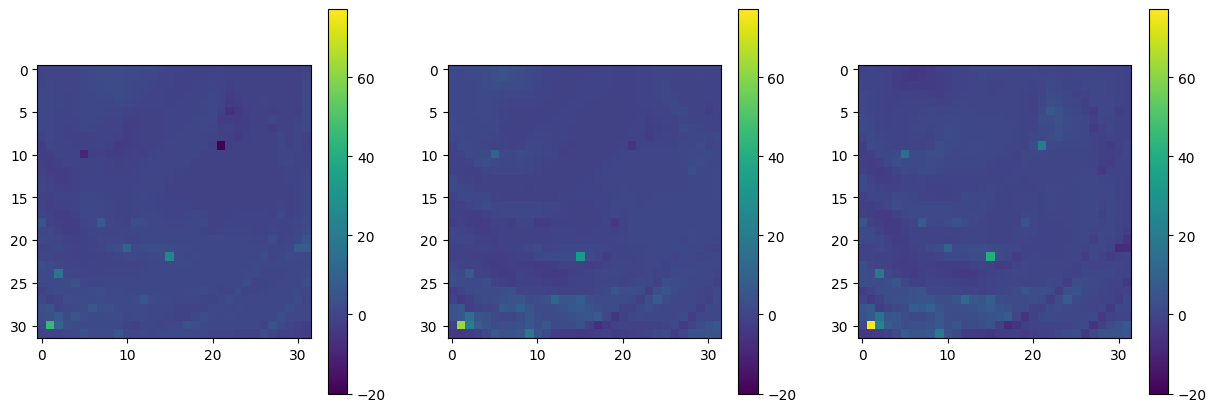

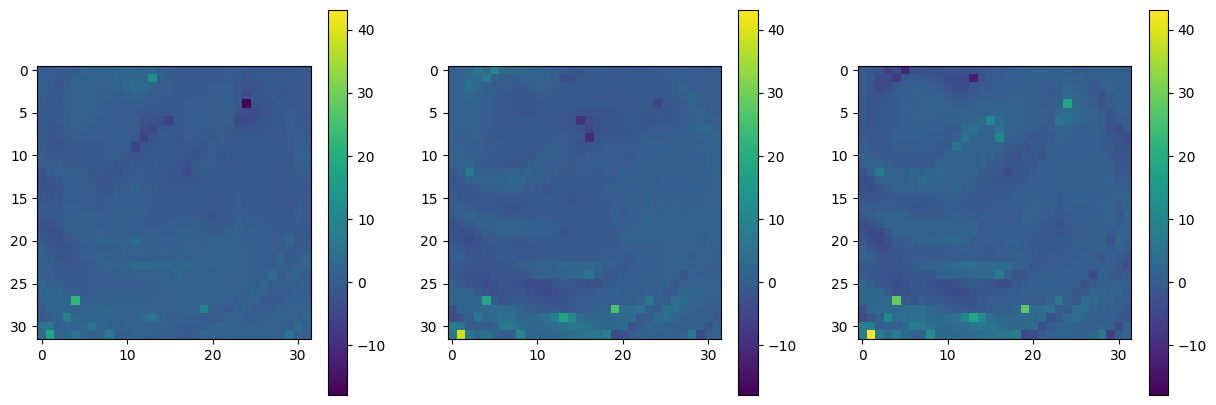

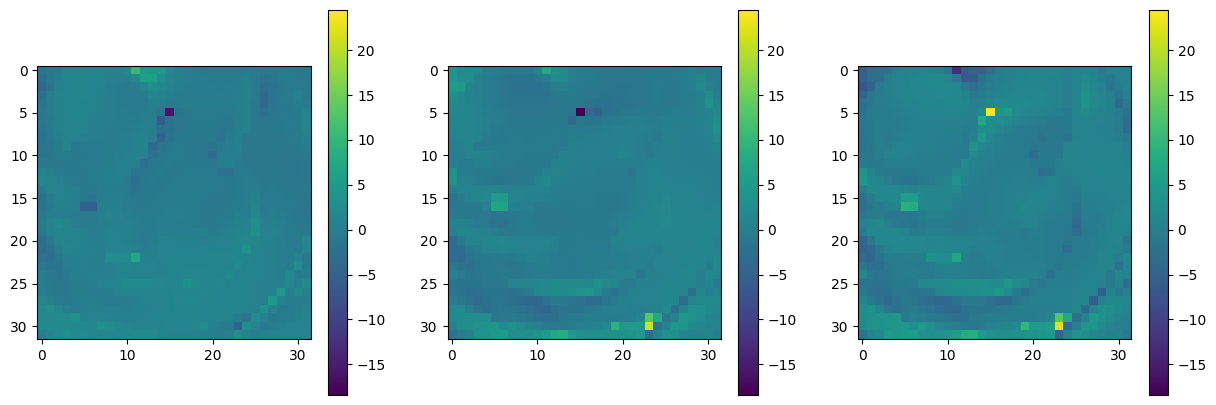

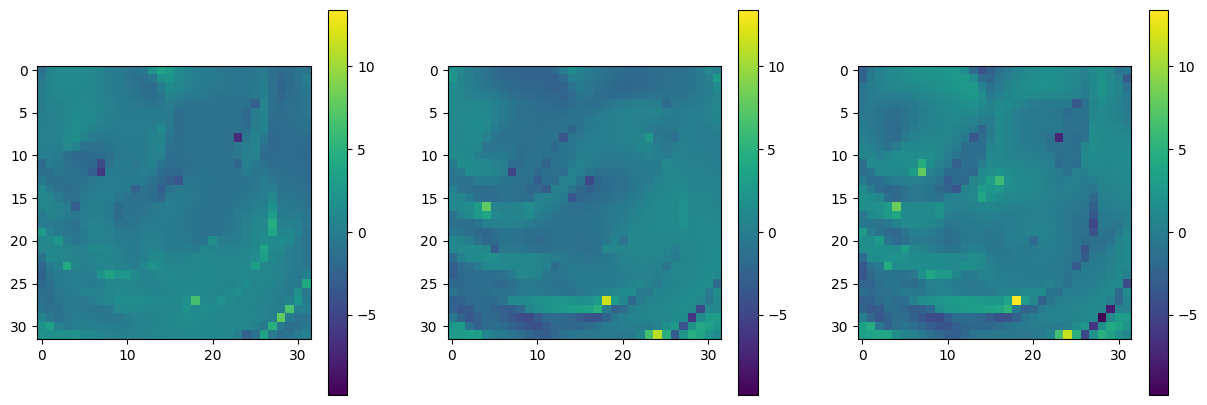

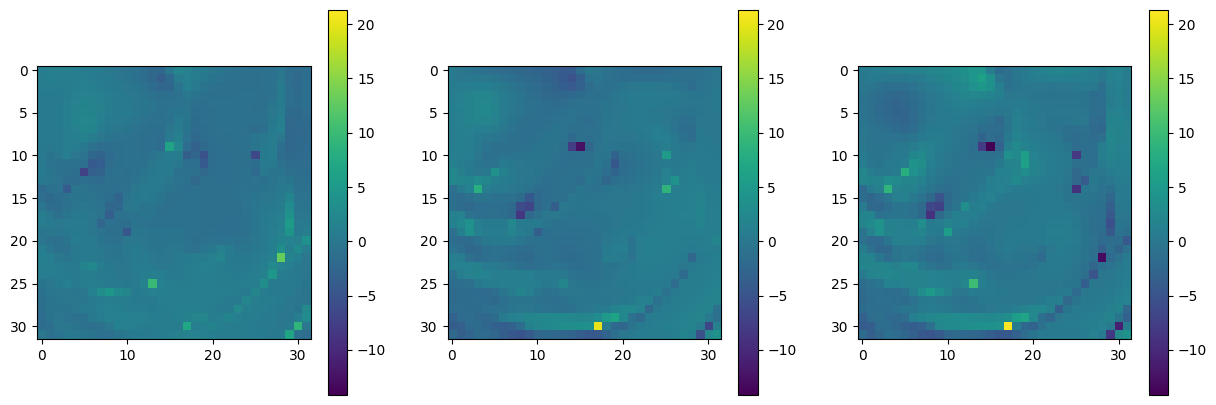

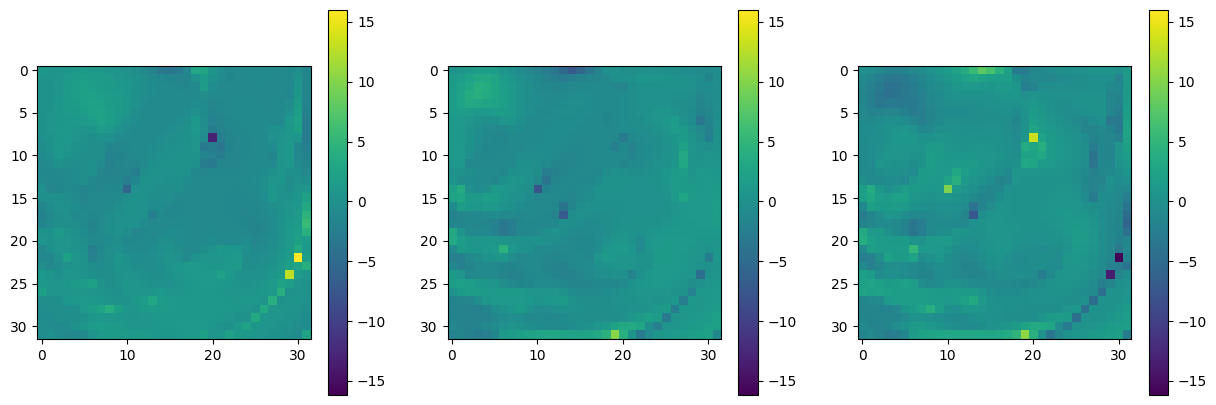

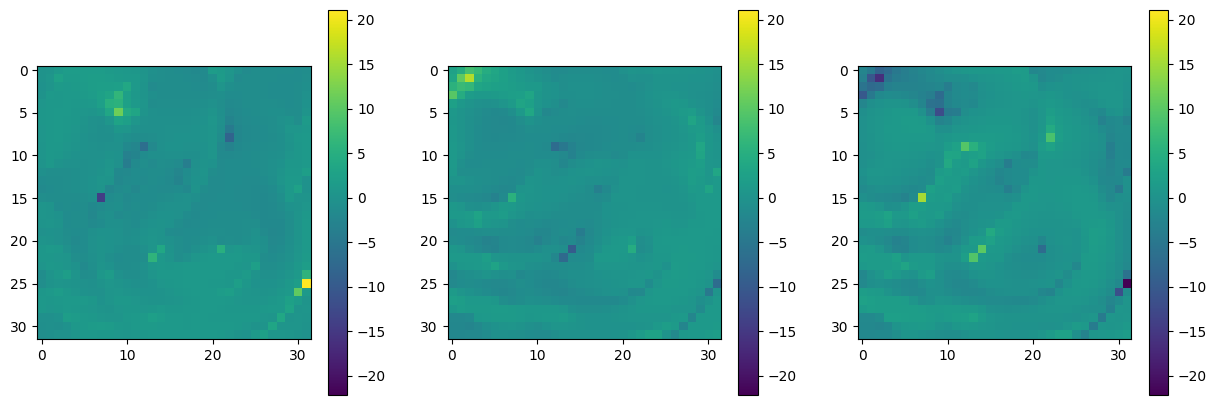

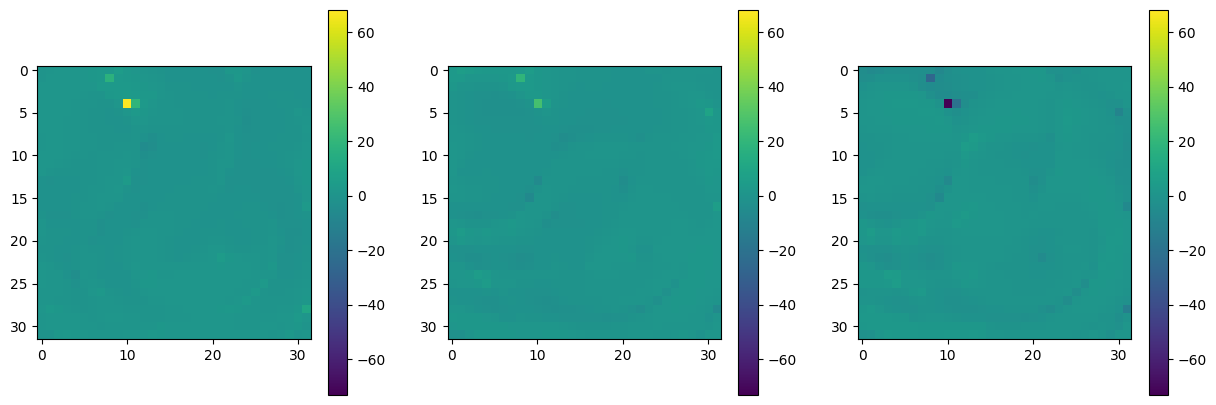

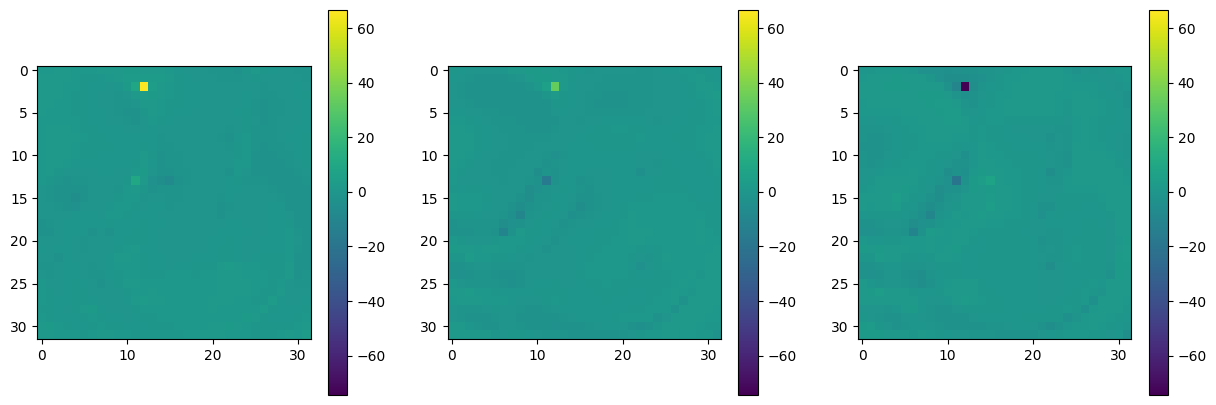

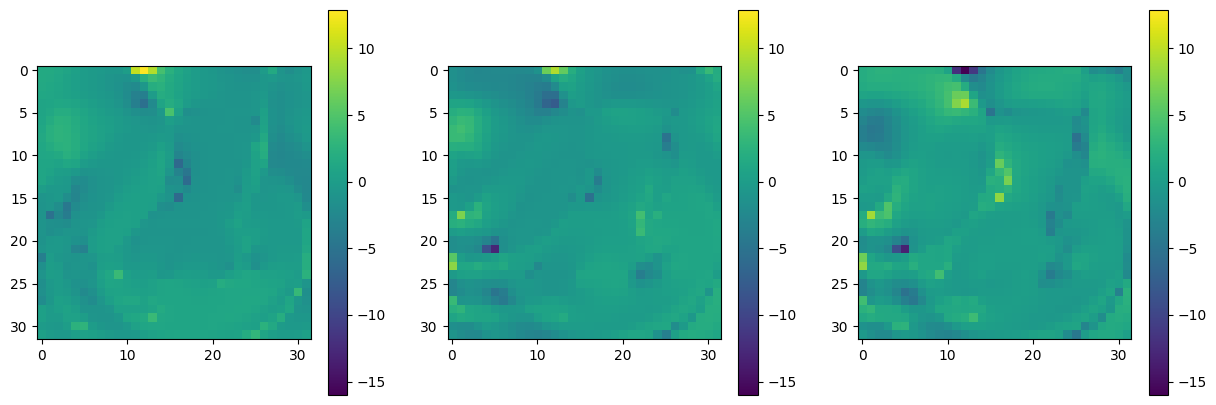

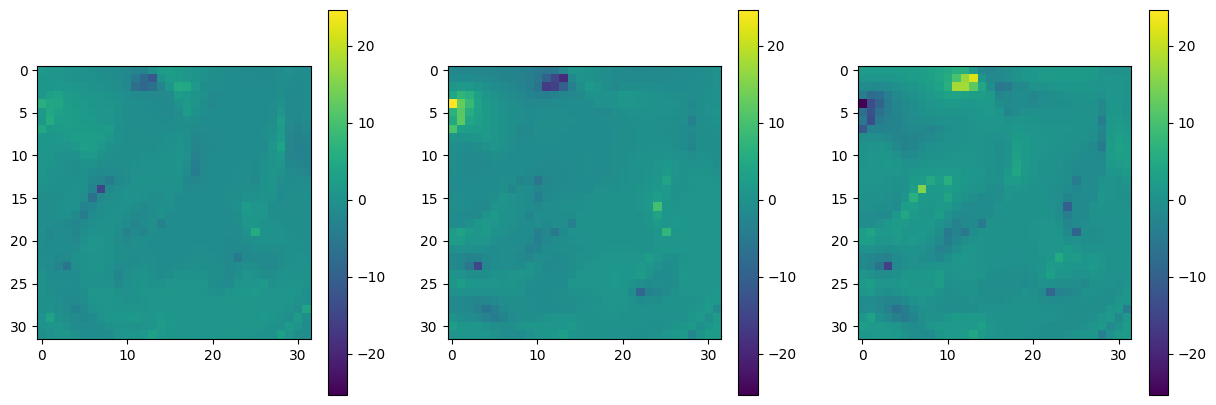

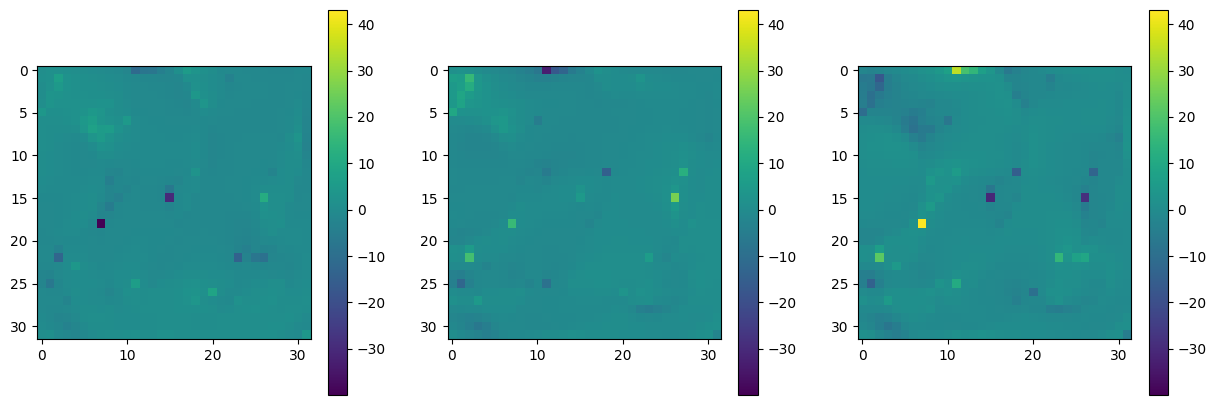

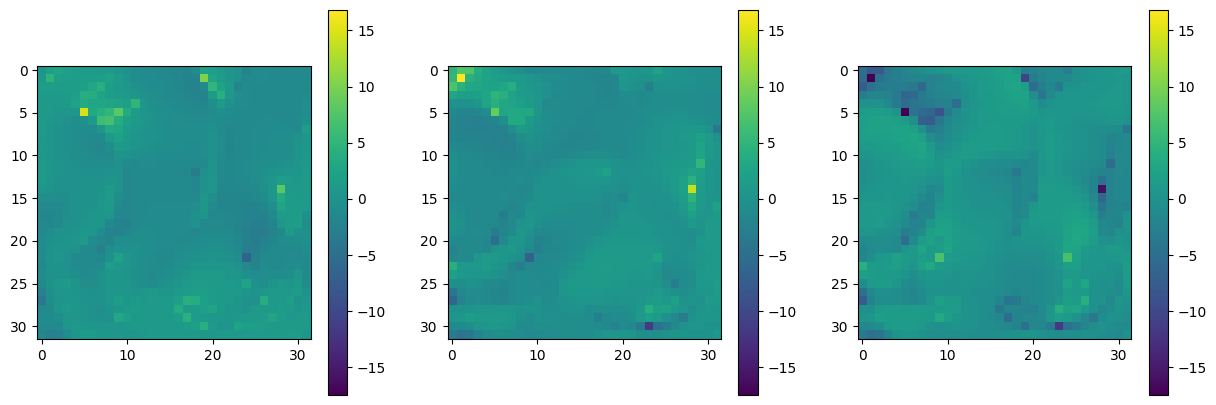

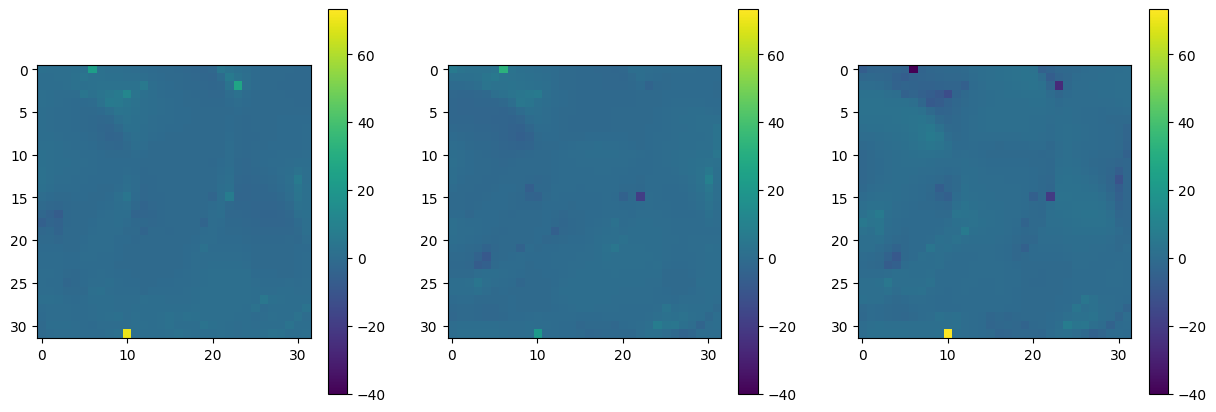

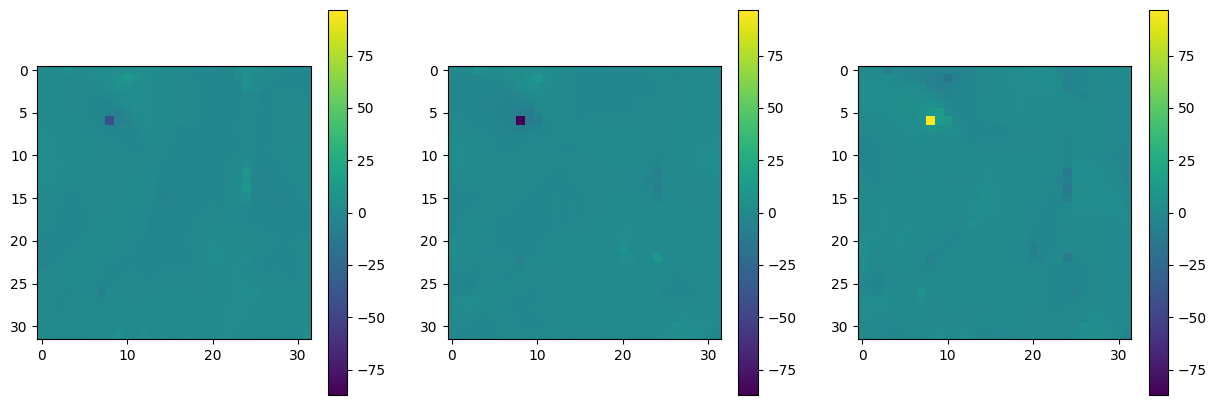

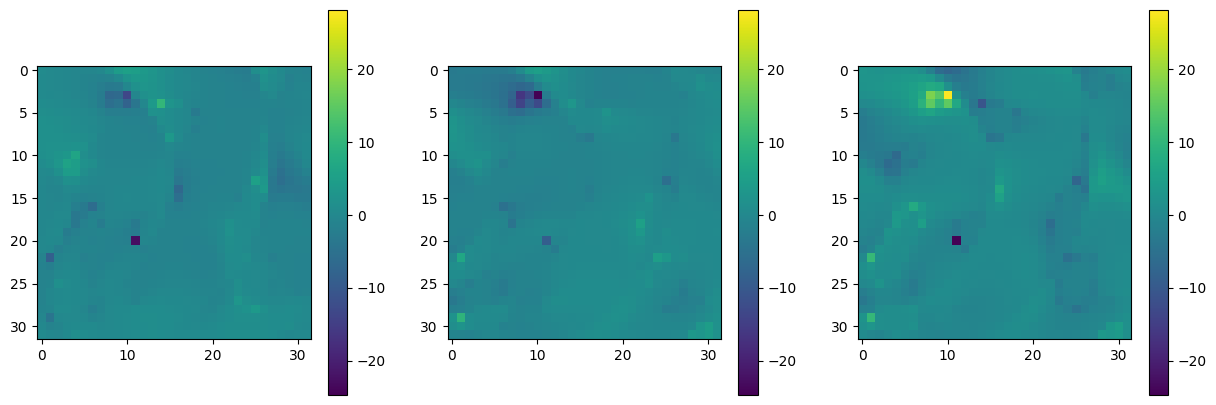

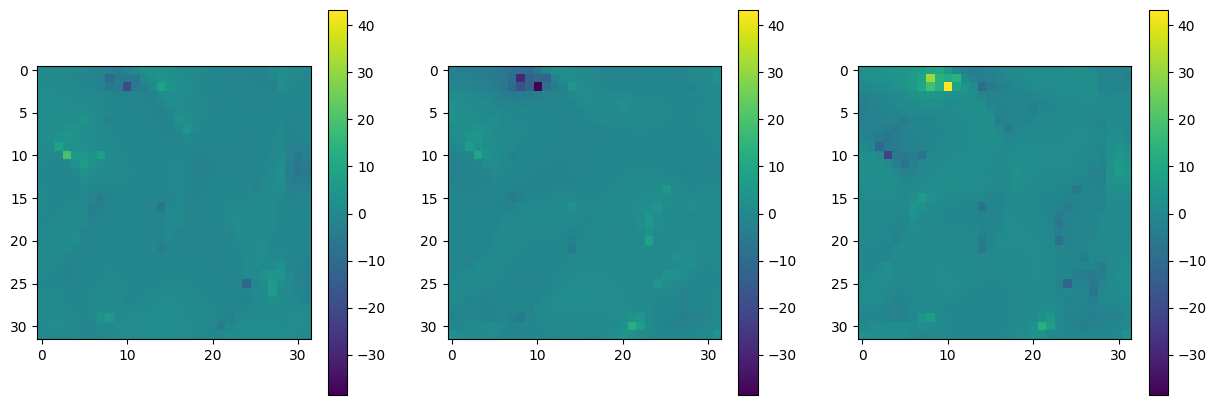

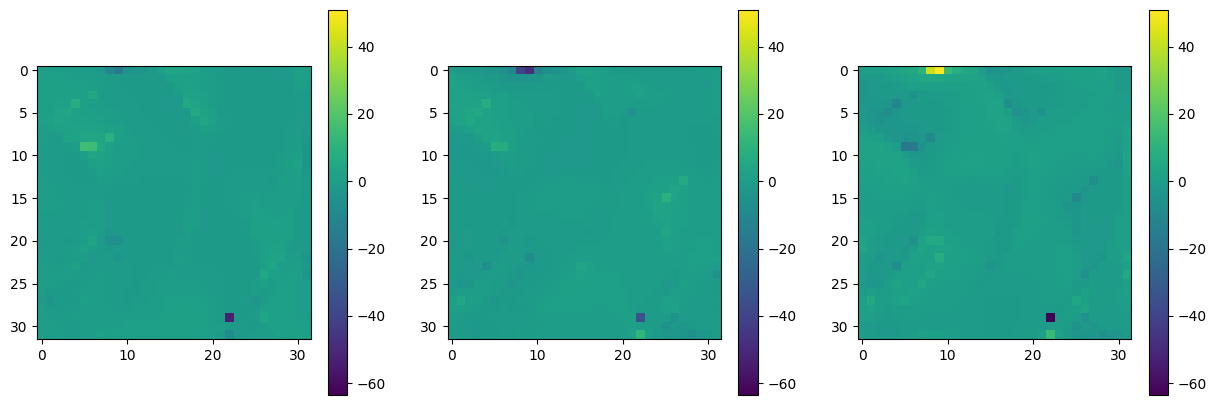

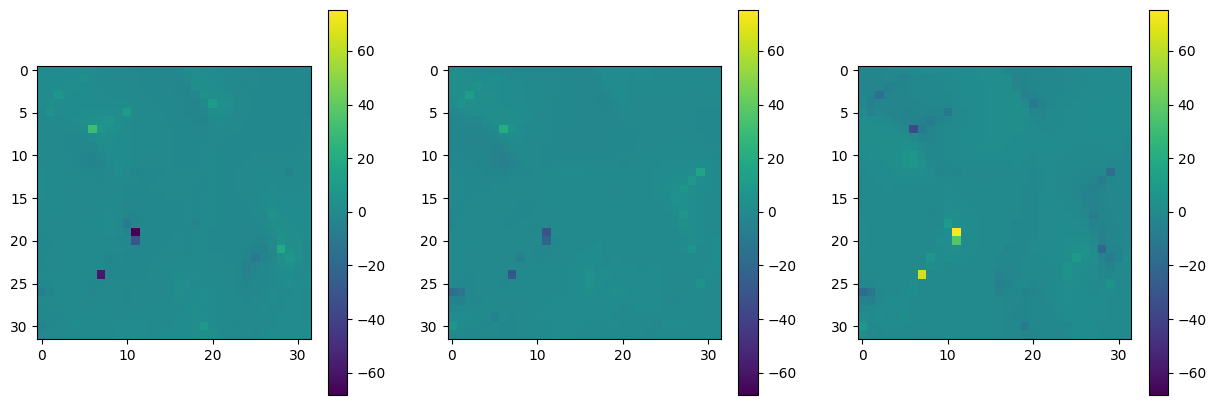

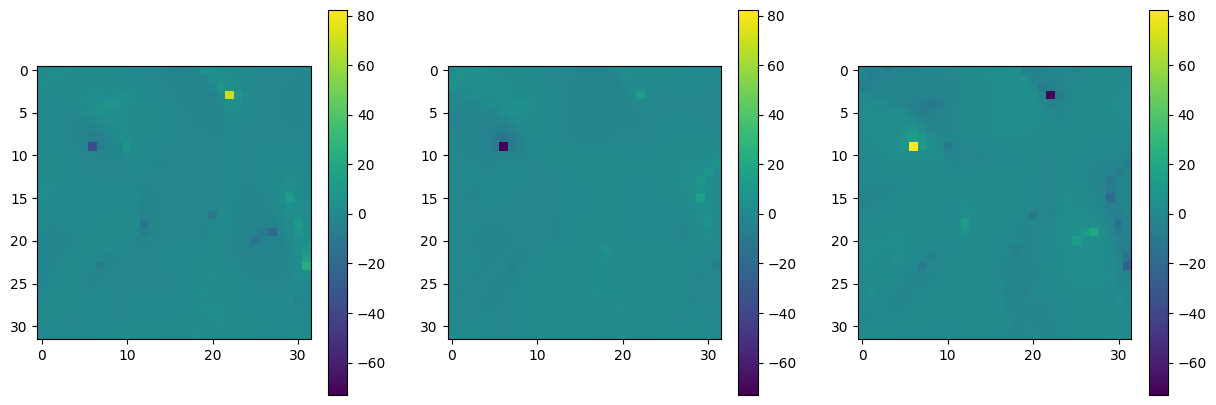

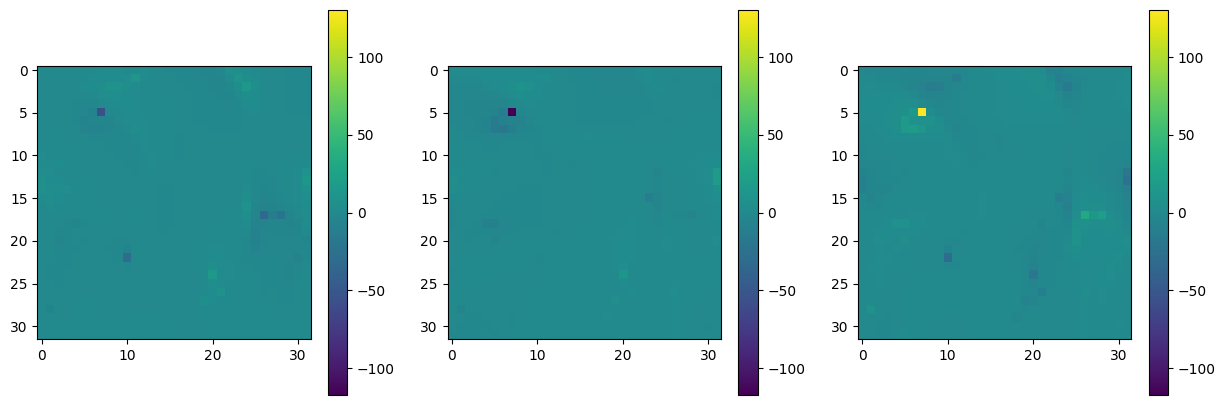

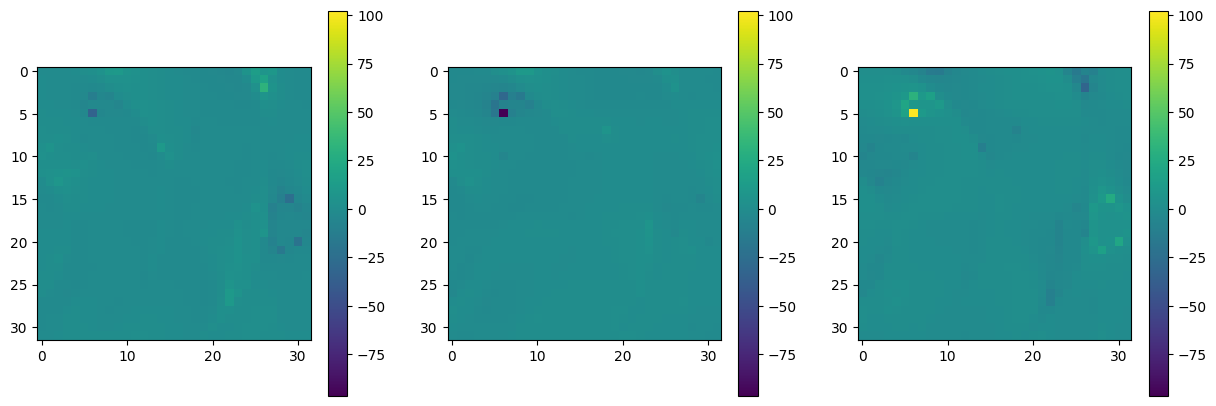

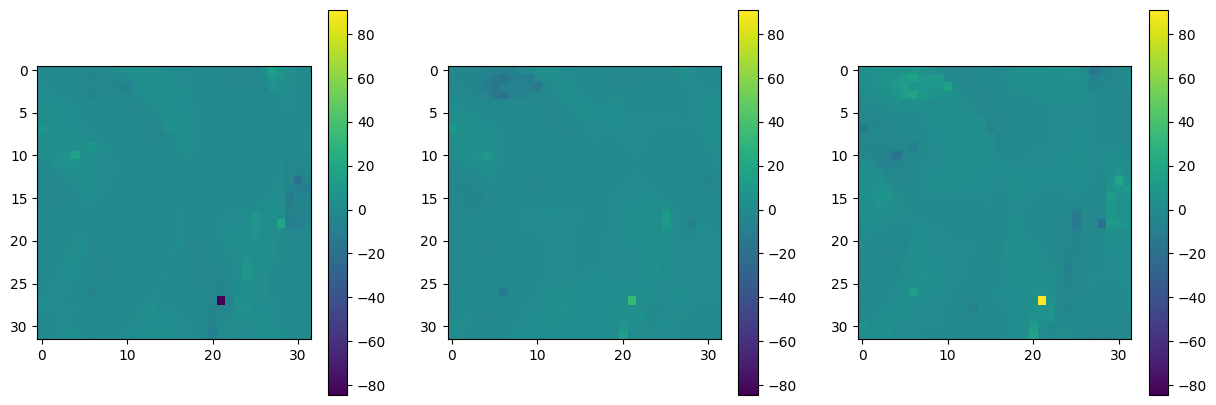

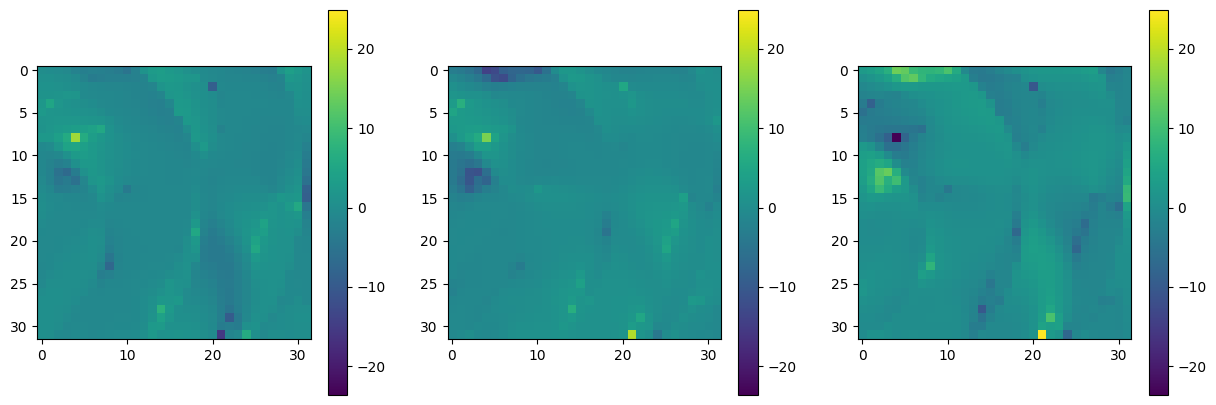

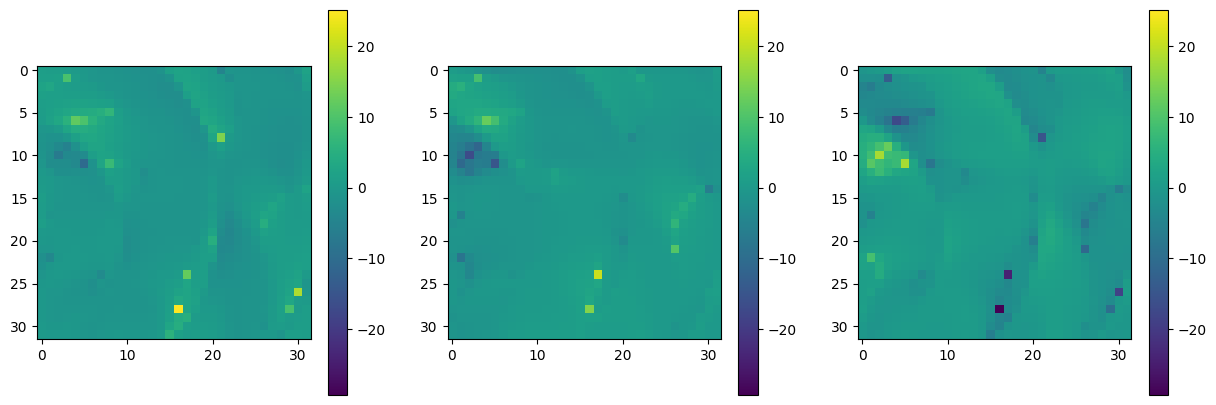

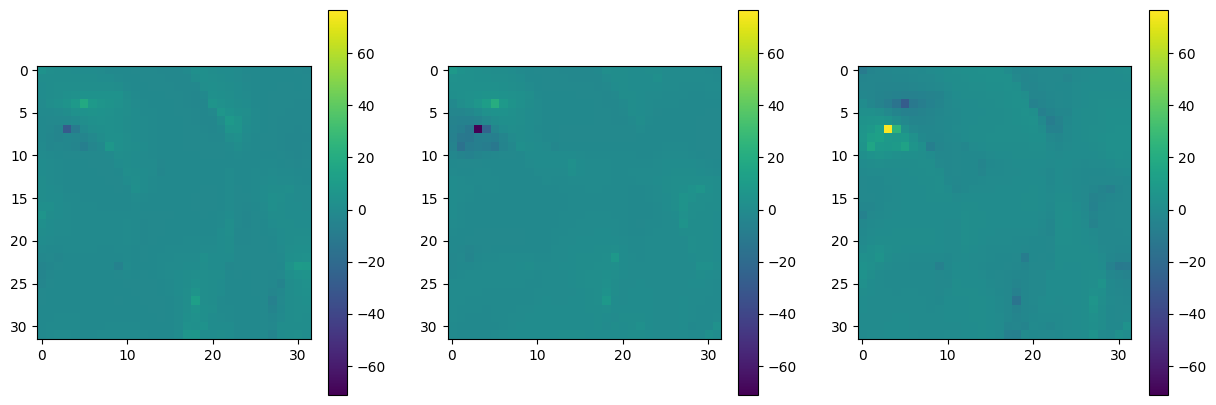

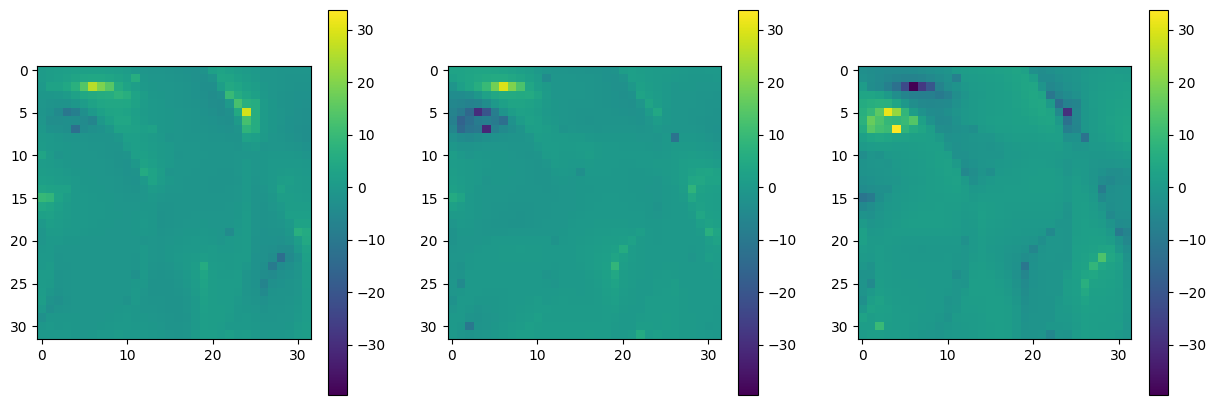

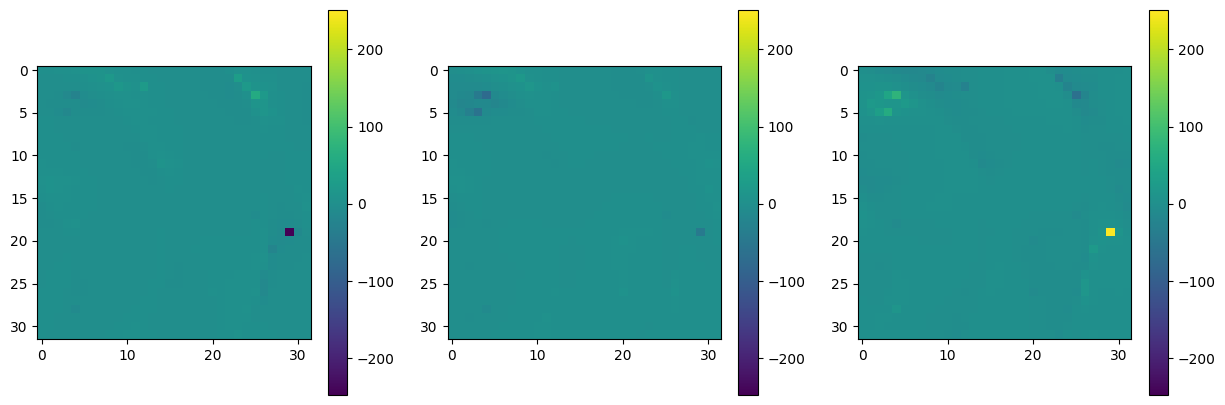

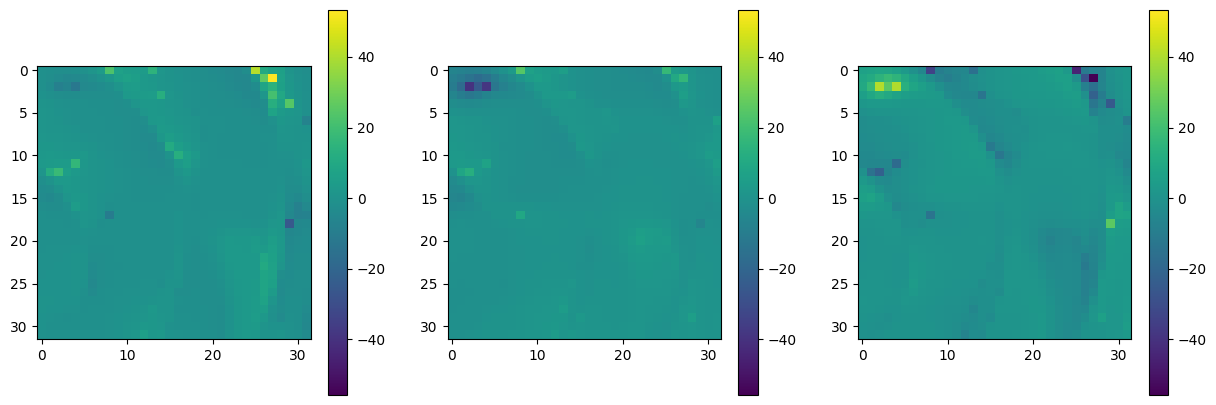

In [27]:
for t in range(32):
    show_data(cl.get_grade(data_norm_cl, 2), t)

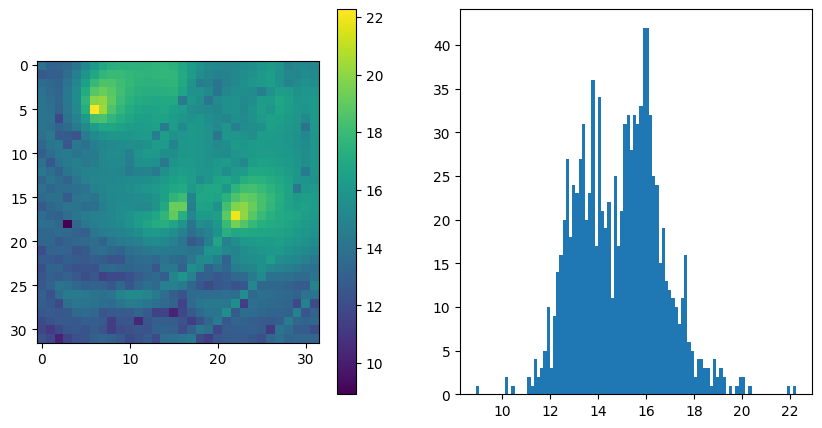

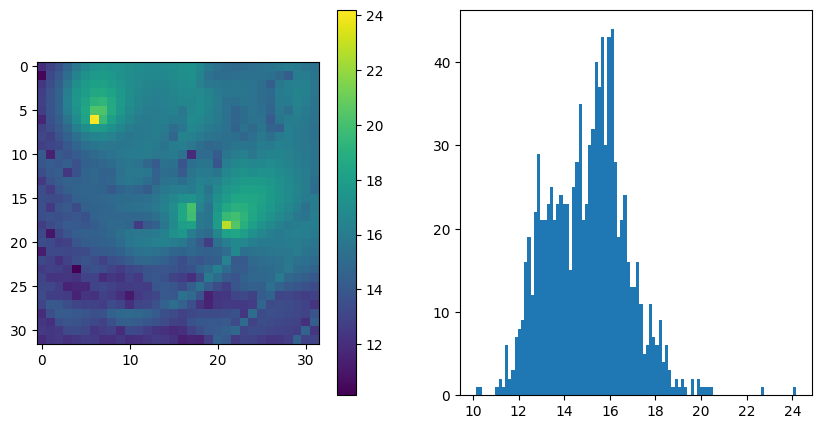

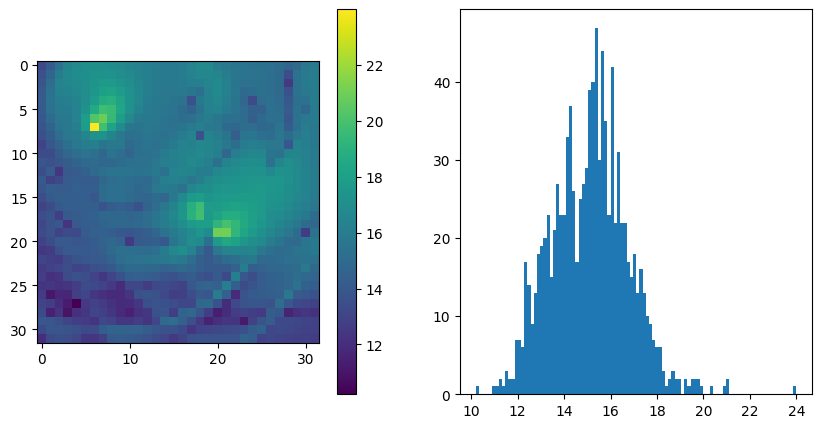

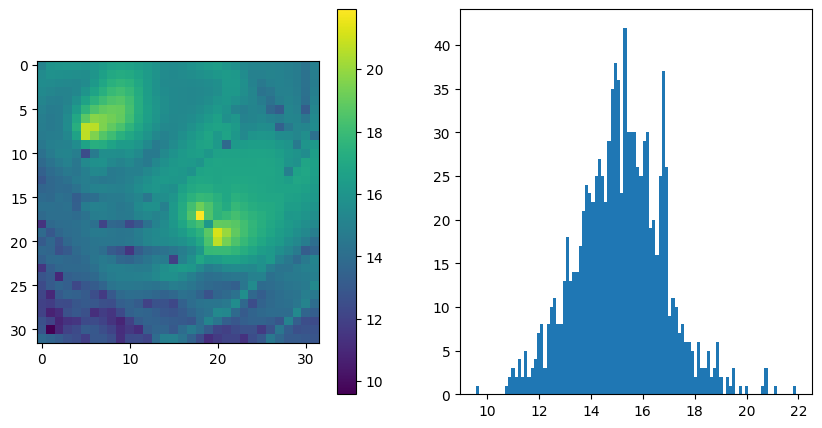

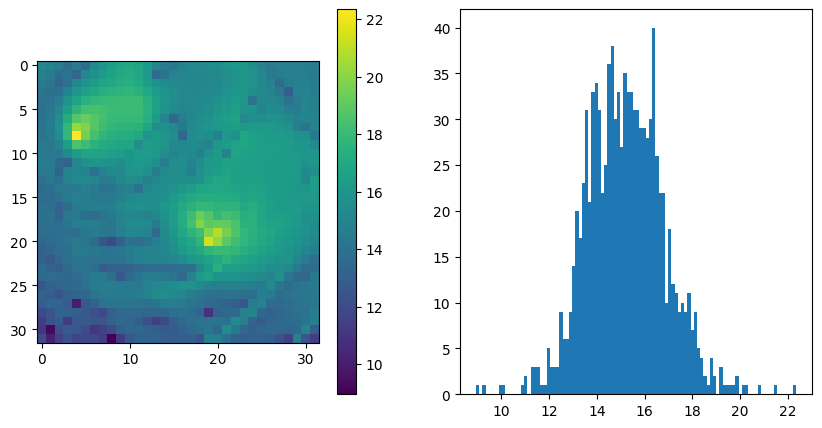

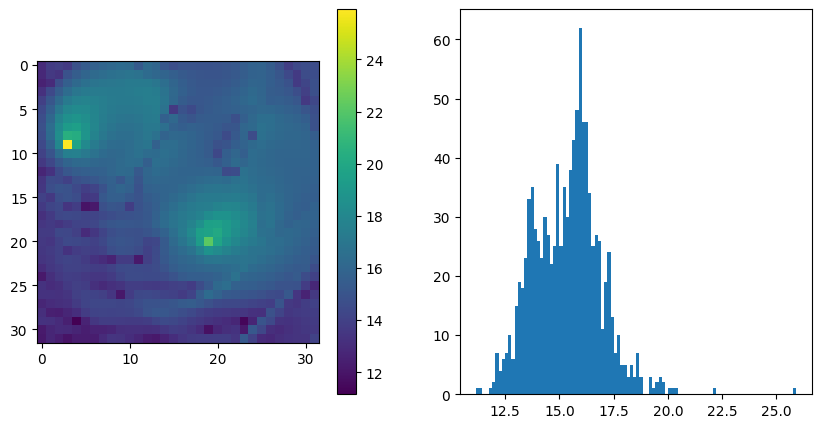

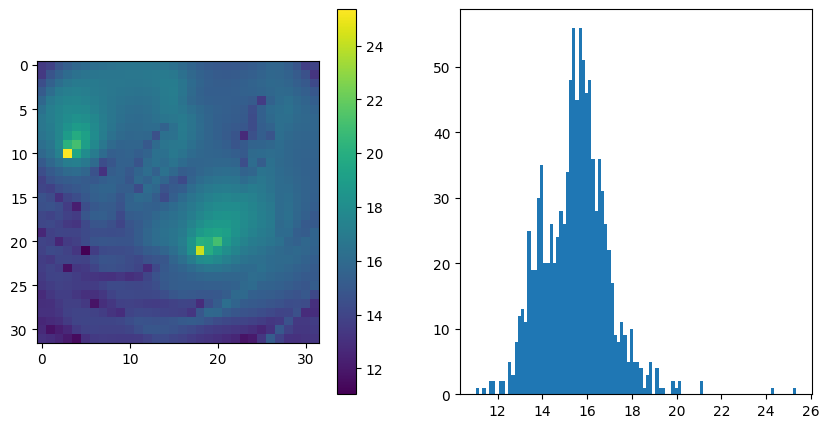

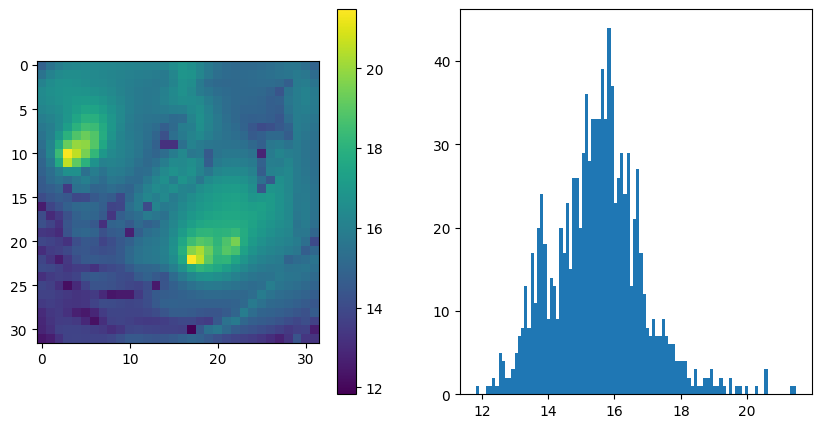

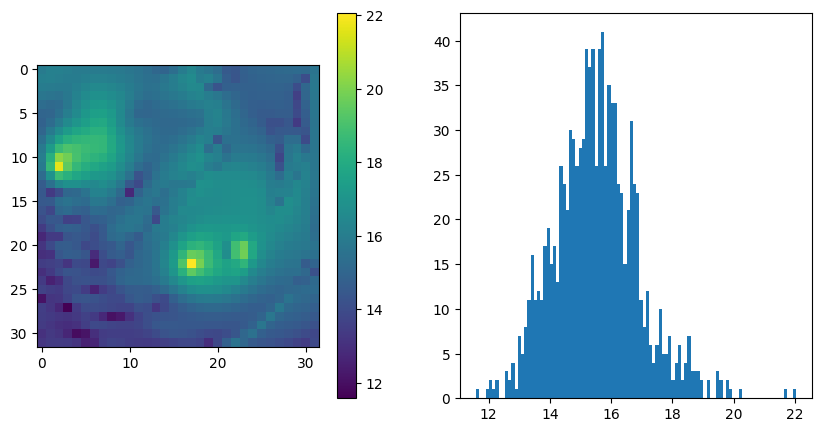

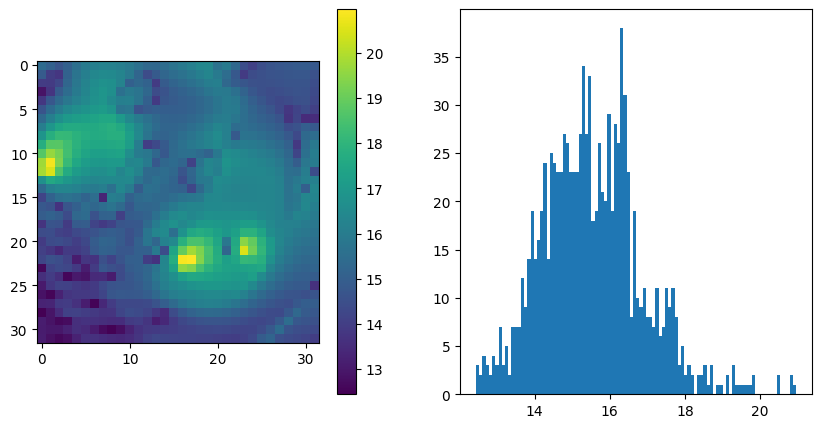

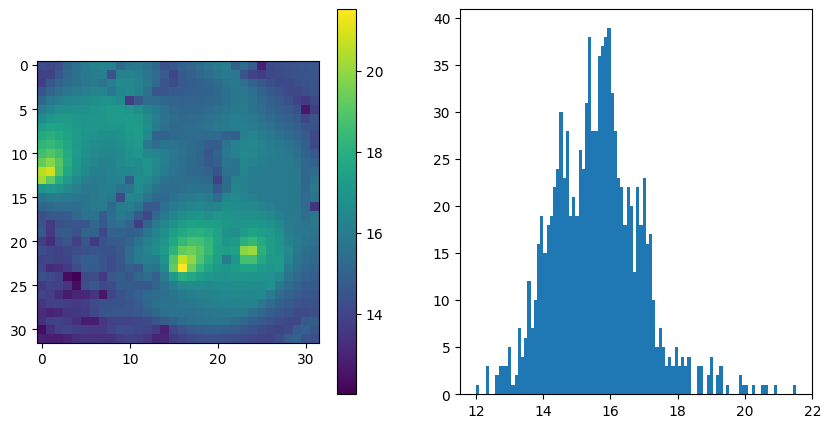

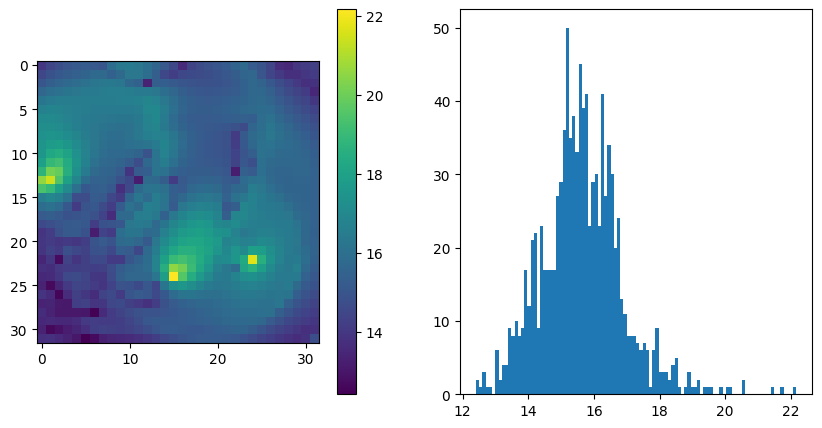

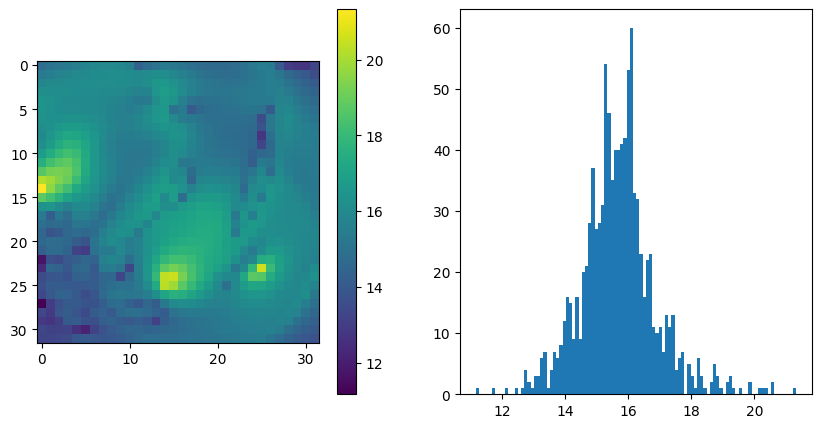

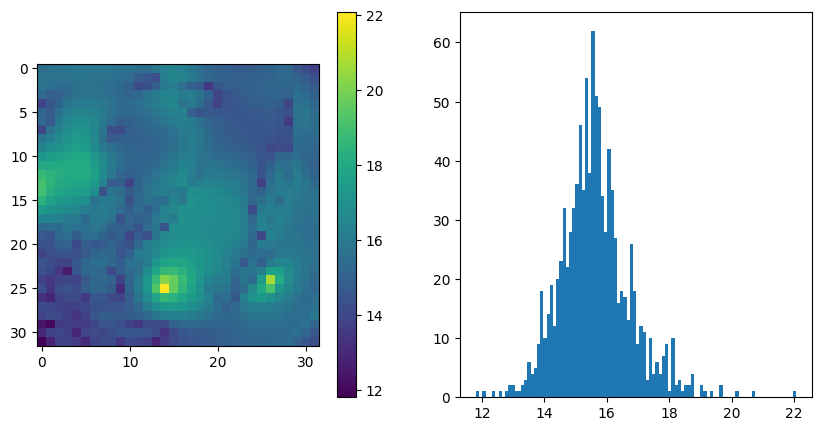

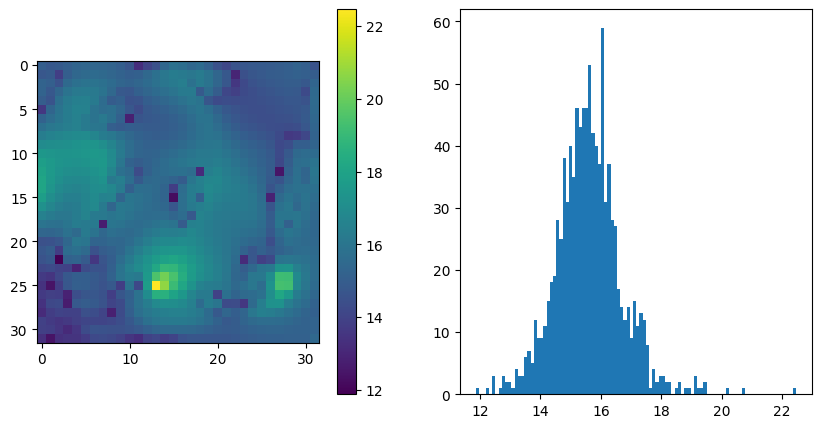

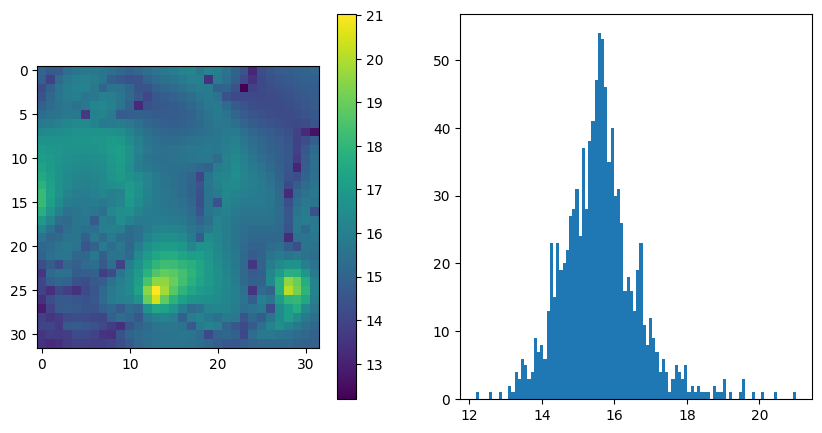

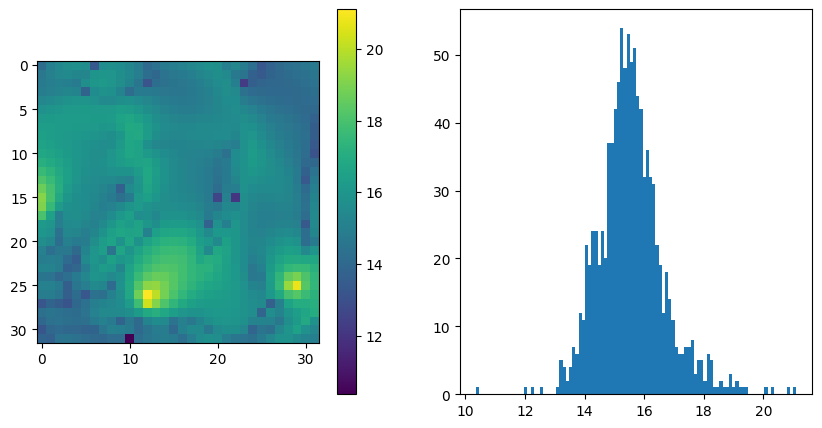

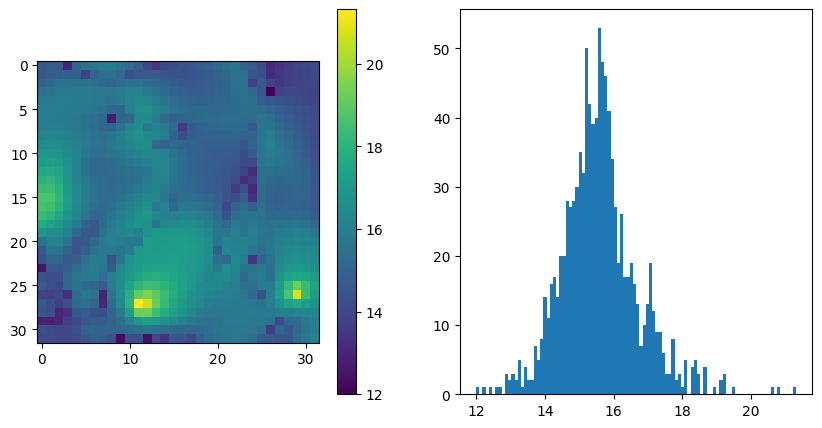

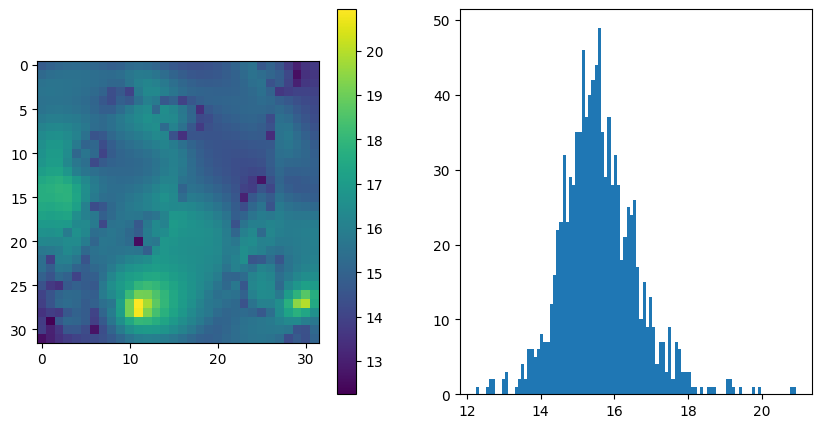

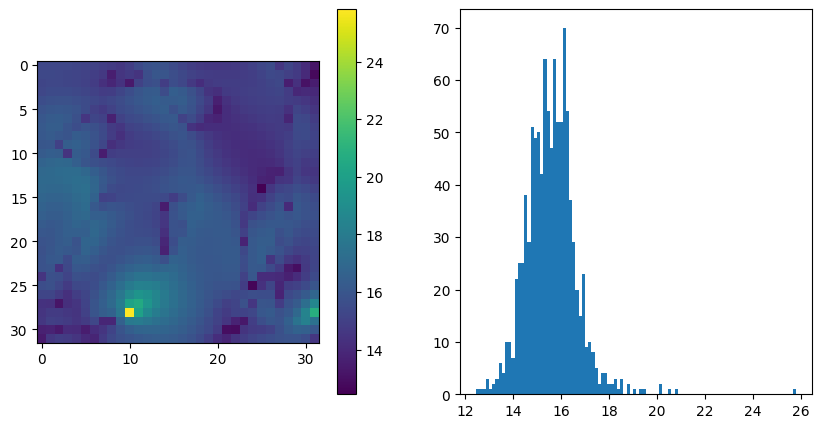

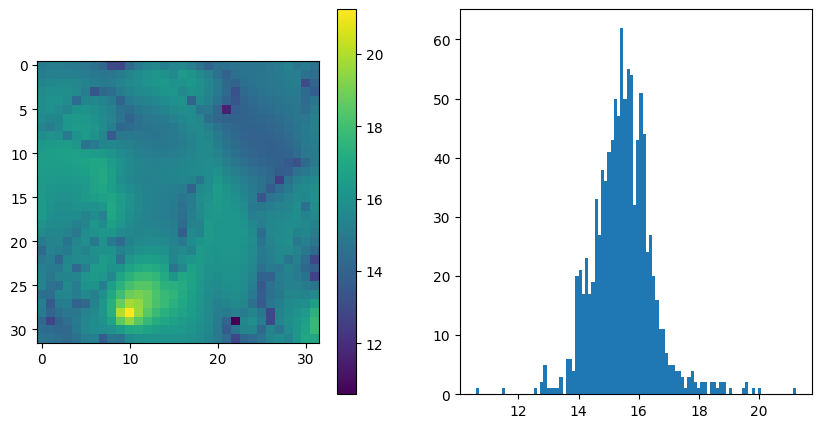

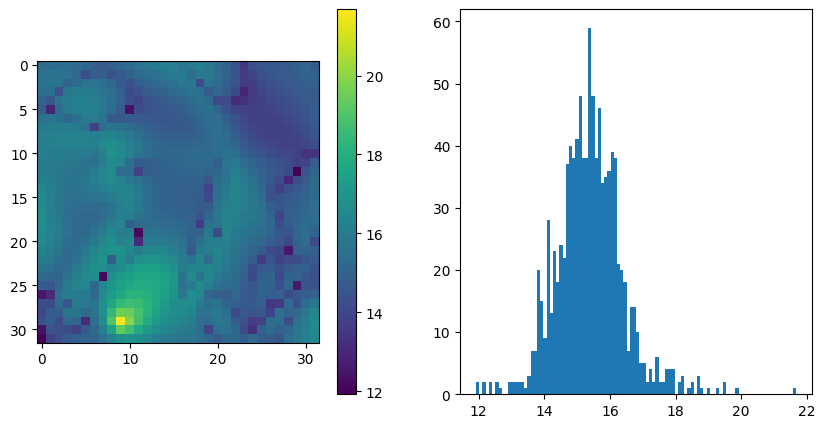

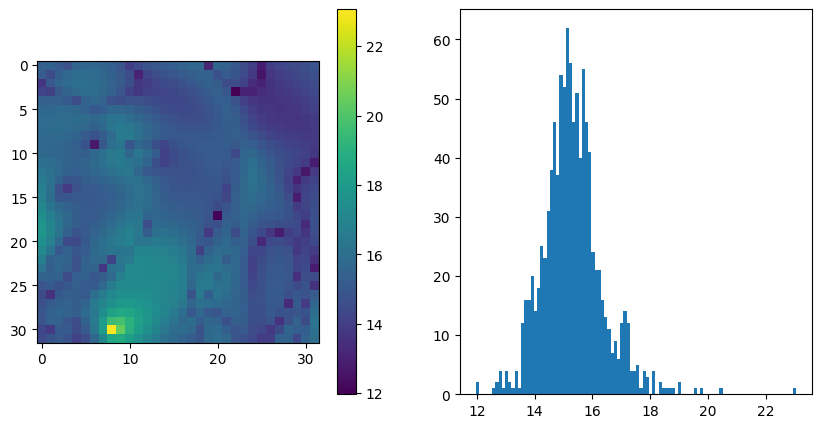

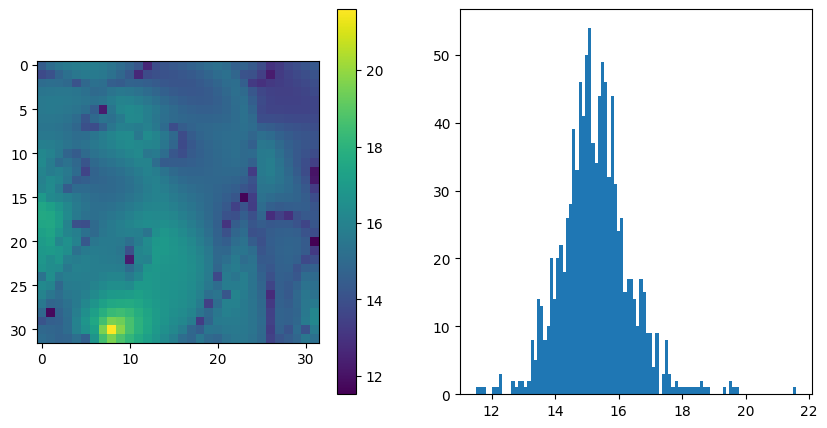

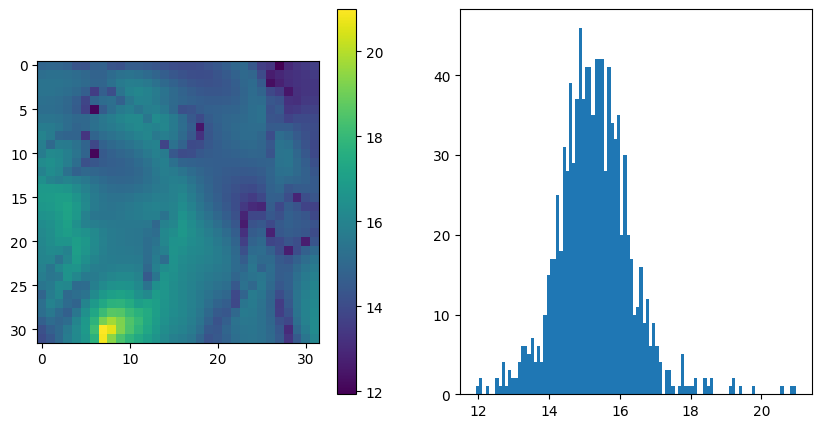

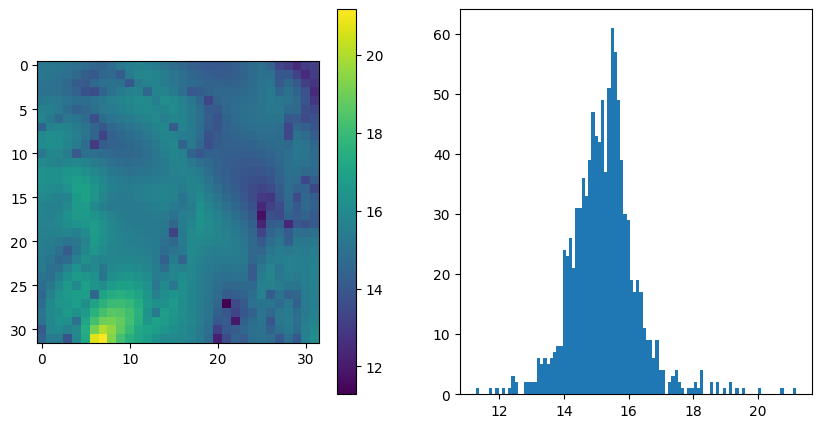

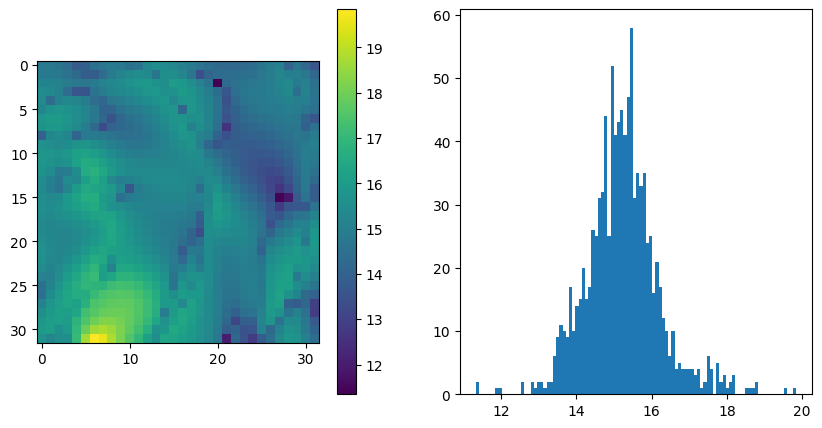

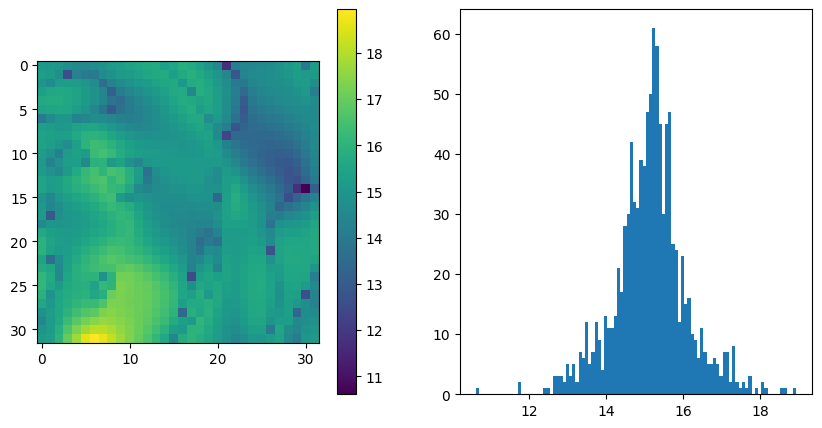

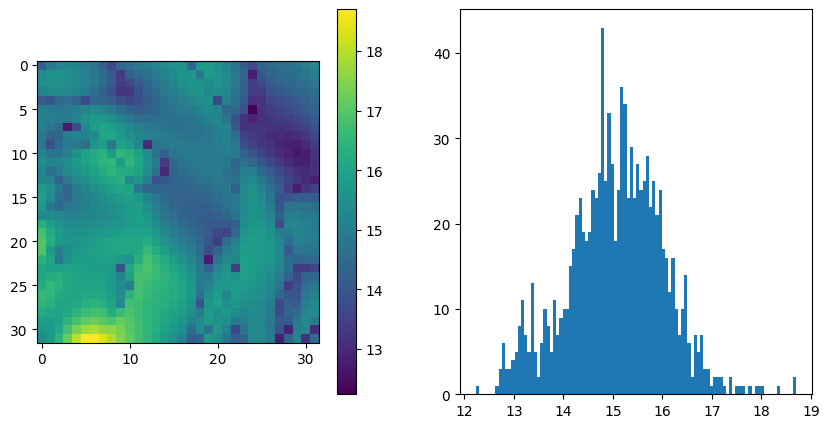

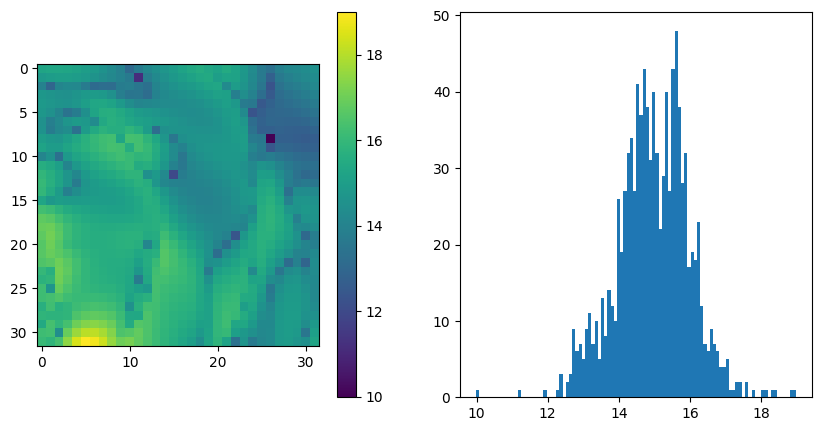

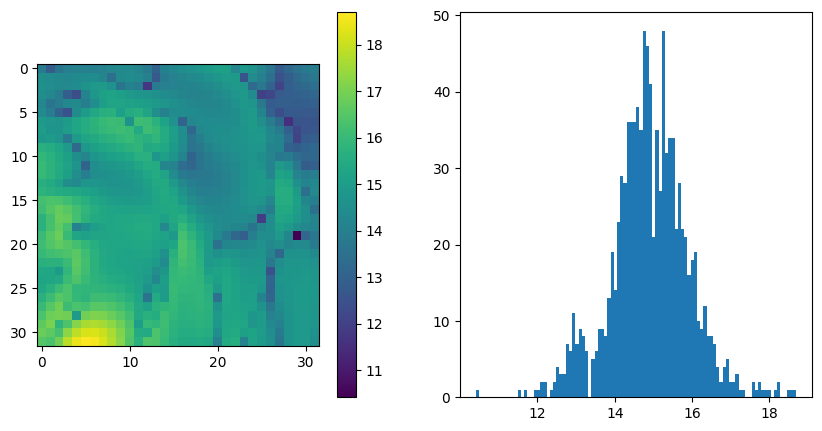

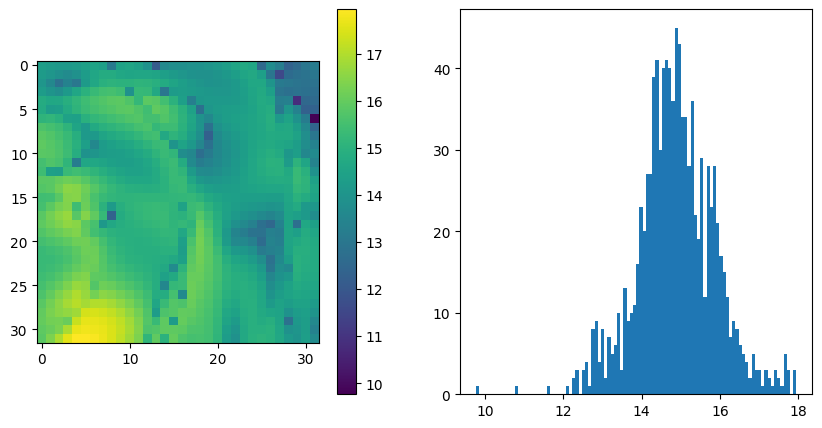

In [28]:
def plot_norm(data, t):
    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

    max_val = data[t].max()
    min_val = data[t].min()

    assert data.ndim ==3 
    im1 = ax[0].imshow(data[t, :, :], vmin=min_val, vmax=max_val)
    fig.colorbar(im1, ax=ax[0])

    # plot histogram
    ax[1].hist(data[t].flatten(), bins=100)
    plt.show()

for t in range(32):
    plot_norm(norm[..., 0].log(), t)